<a href="https://colab.research.google.com/github/Huin9/Huin9/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
package_version(R.version)

[1] ‘4.0.5’

In [ ]:
library(repr)
options(repr.plot.width=16, repr.plot.height=8, repr.plot.res = 120)

---
> # **1. 시계열 데이터 분해 개요** 
--- 
----- < [시계열 데이터 분해](https://www.youtube.com/watch?v=cUS2uISiwCA) >   
1. 시계열 데이터 분해(time series decomposition)는 시계열 데이터의 관측값을 변동요인에 따라 구성 성분으로 분해하는 과정

2. 시계열 데이터는 일반적으로 관측값의 전반적 상승 또는 하락 경향을 나타내는 **추세성분**과 설명 안 되는 **오차(error)**를 나타내는 불규칙 성분으로 구성

3. 시계열 데이터에 주기가 존재하고 계절적 요인의 영향을 받아 변동한다면 **계절 성분**이 추가로 포함

---
> ## **1-1. 비계절 데이터 분해**
---

  
- 불규칙적 변동요인을 제거 또는 완화하여 의미있는 추세 패턴 파악

- **평활법** ( *smoothing method* ) :
  - **단순이동평균**( *simple moving average* ) / **중심이동평균** ( *centered moving average* )

  $$ y'_{t} = ( y_{t-m} + ... + y_{t} + ... + y_{t+m} )/k $$

  - 여기에서
    - *y't* 은 *t*시점에서의 이동평균에 의해 평활된 값
    - *yt* 는 *t*시점에서의 관측값
    - *k*는 평균을 산출하기 위해 사용되는 관측값의 개수 ( k = 2m +1 )
    - 시계열 데이터 양쪽 끝의 $\frac{k-1}{2}$ 개의 관측값은 계산에서 제외됨

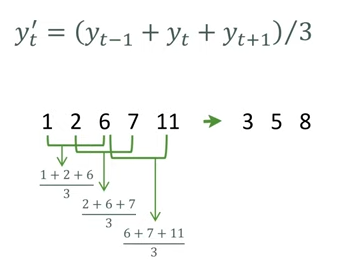



In [ ]:
nhtemp

A Time Series:
 [1] 49.9 52.3 49.4 51.1 49.4 47.9 49.8 50.9 49.3 51.9 50.8 49.6 49.3 50.6 48.4
[16] 50.7 50.9 50.6 51.5 52.8 51.8 51.1 49.8 50.2 50.4 51.6 51.8 50.9 48.8 51.7
[31] 51.0 50.6 51.7 51.5 52.1 51.3 51.0 54.0 51.4 52.7 53.1 54.6 52.0 52.0 50.9
[46] 52.6 50.2 52.6 51.6 51.9 50.5 50.9 51.7 51.4 51.7 50.8 51.9 51.8 51.9 53.0

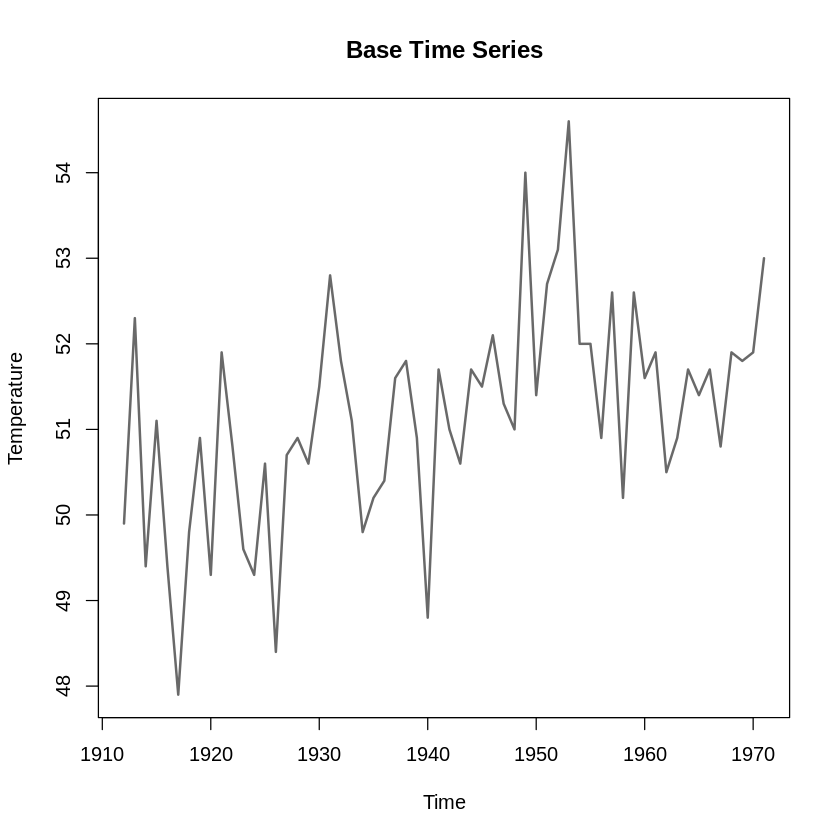

In [ ]:
plot(nhtemp, col = 'dimgray', lwd = 2,
      ylab = "Temperature",
      main = "Base Time Series")

In [ ]:
#install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(forecast)

In [ ]:
ma(nhtemp, 3)

In [ ]:
ma(nhtemp, 7)

In [ ]:
ma(nhtemp, 11)

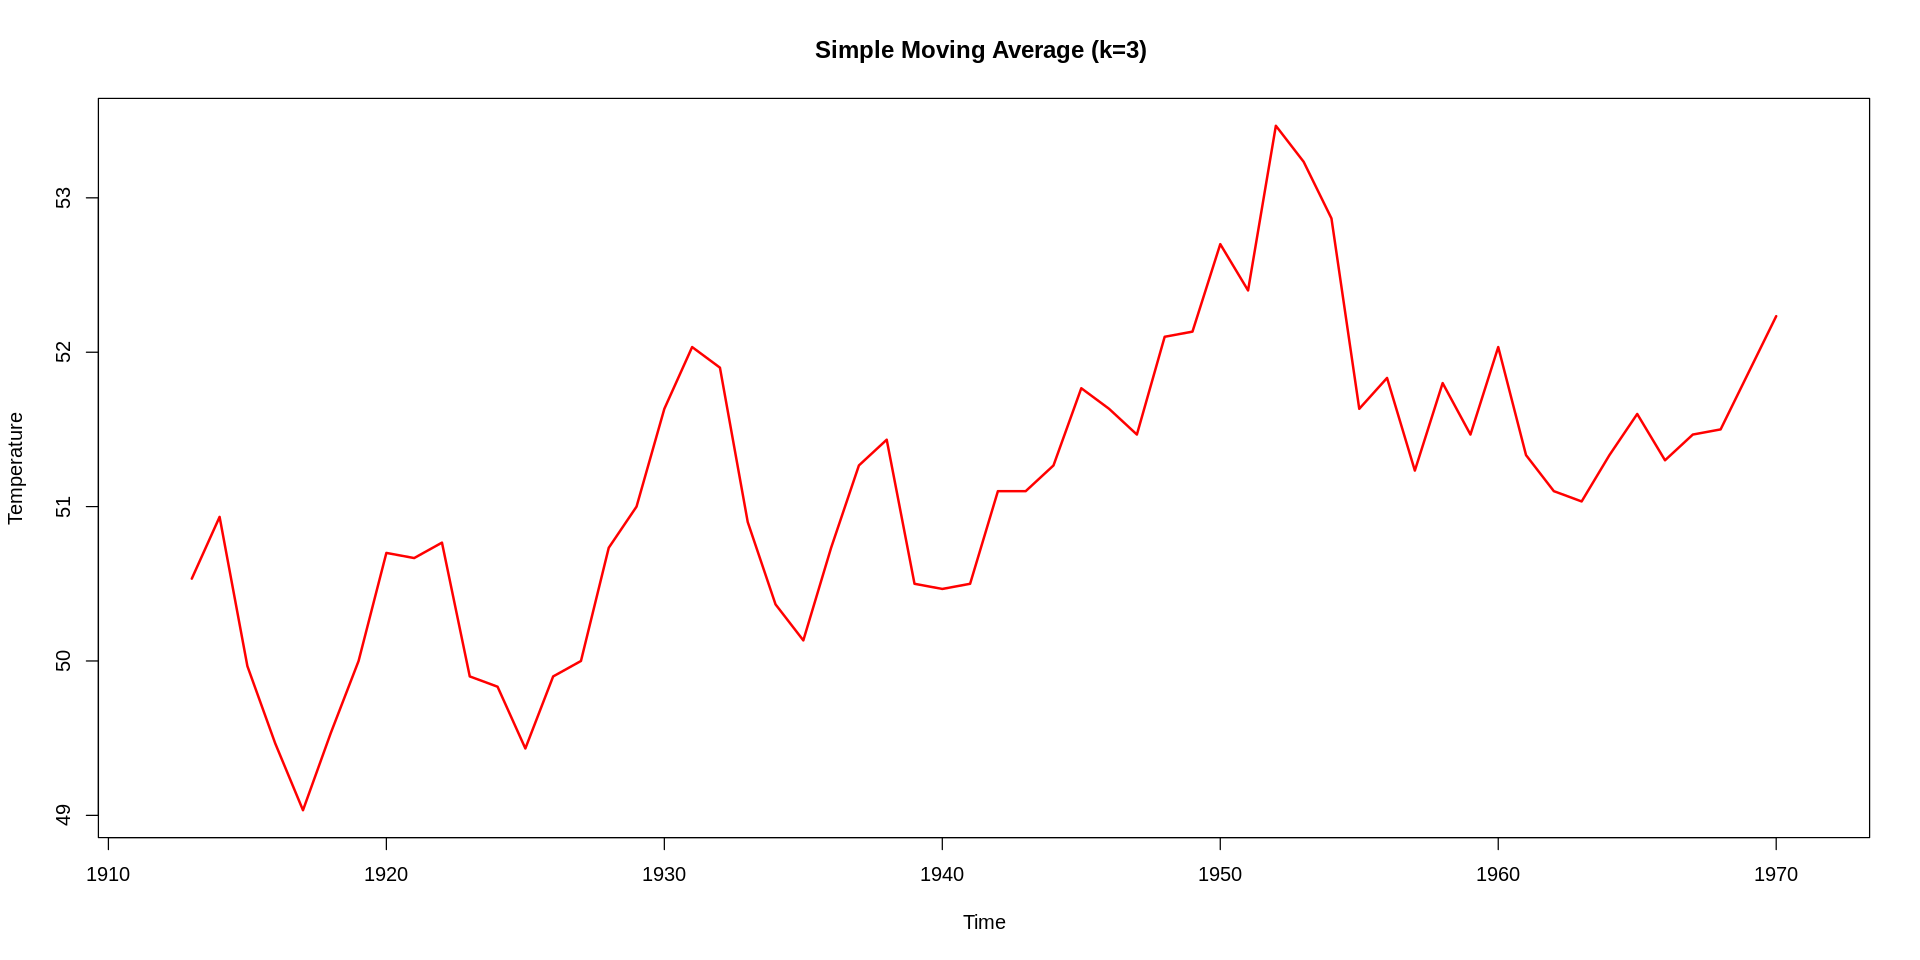

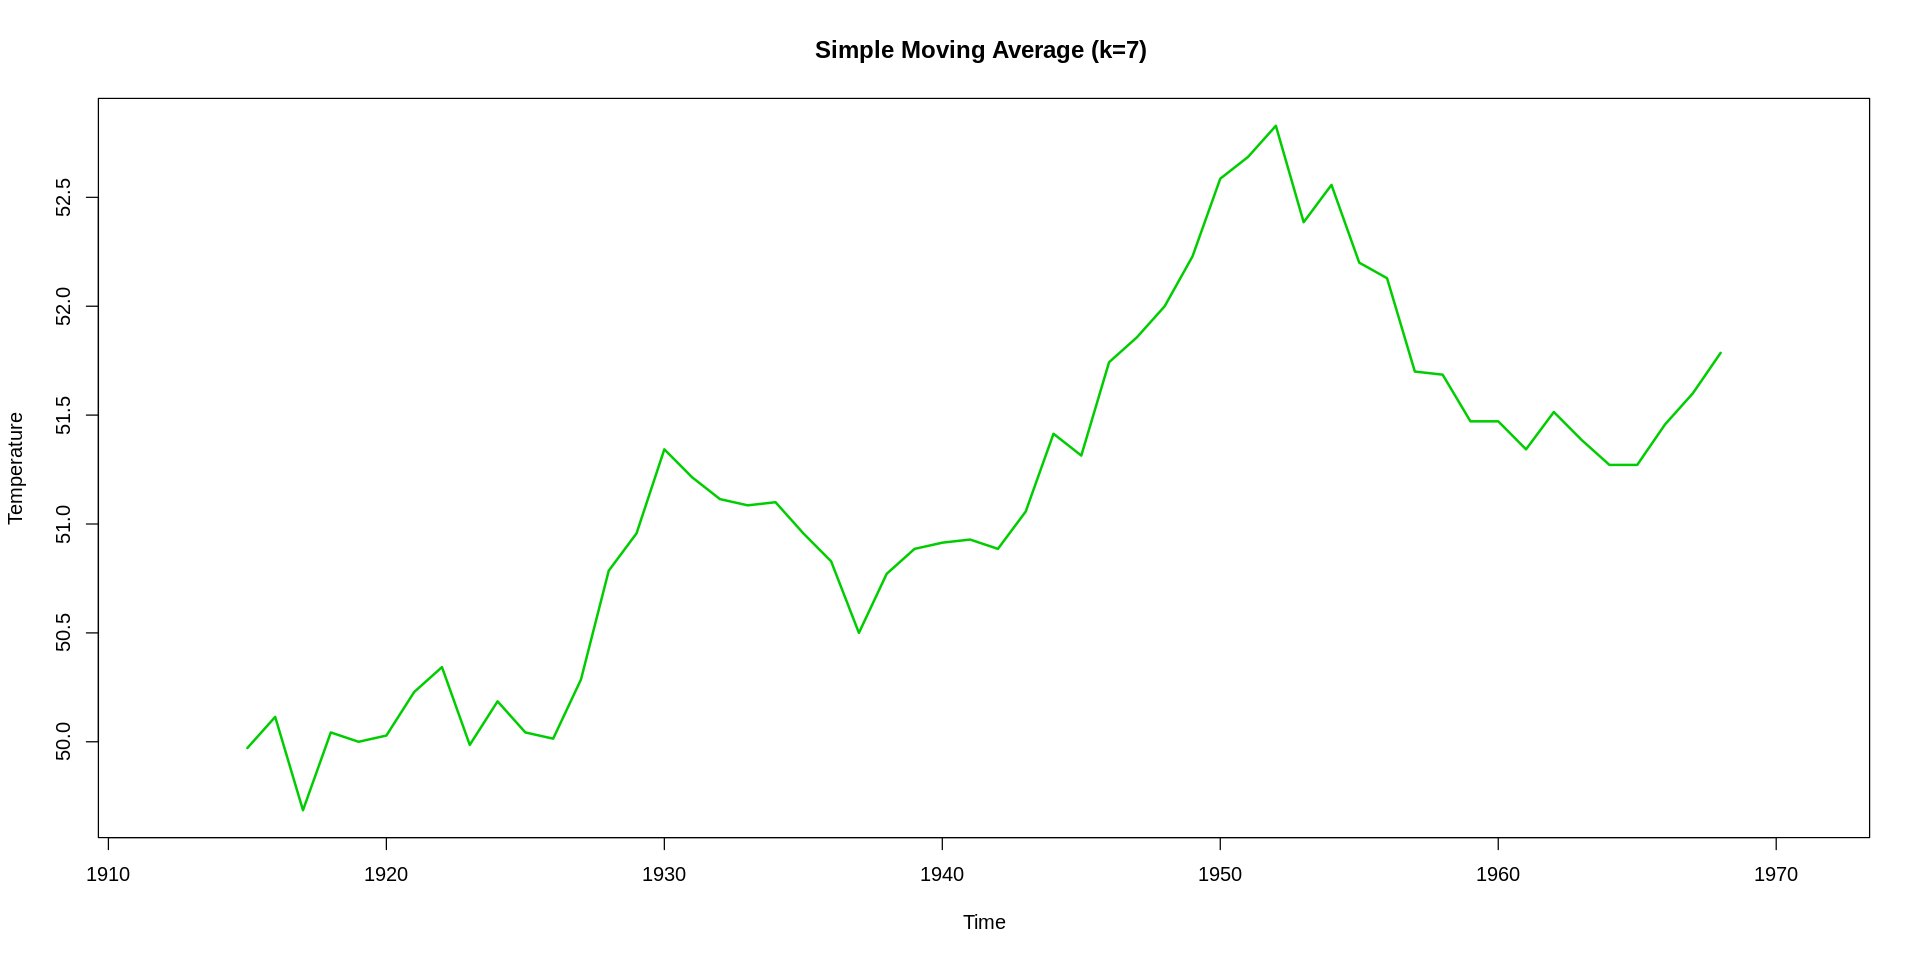

In [ ]:
par(mfrow = c(1,1))
plot(ma(nhtemp, 3), col = 'red', lwd = 2,
      ylab = "Temperature",
      main = "Simple Moving Average (k=3) ")
plot(ma(nhtemp, 7), col = 'green3', lwd = 2,
      ylab = "Temperature",
      main = "Simple Moving Average (k=7) ")

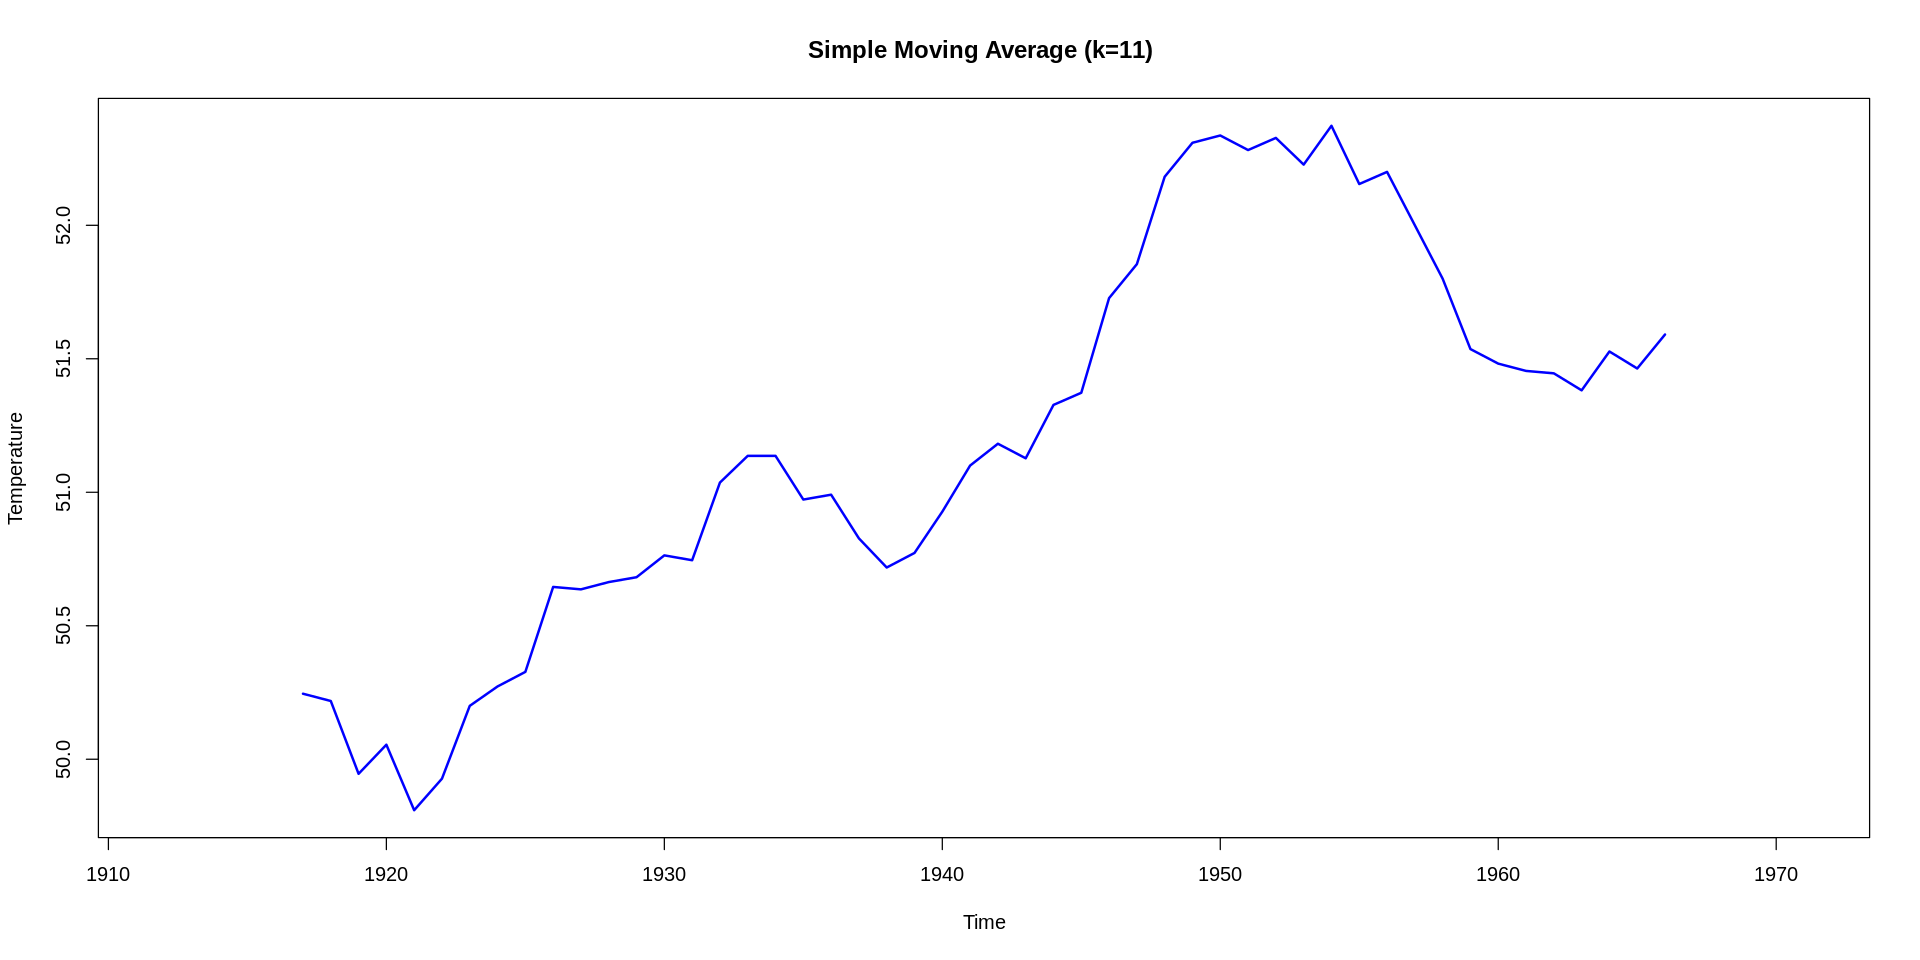

In [ ]:
plot(ma(nhtemp, 11), col = 'blue', lwd = 2,
      ylab = "Temperature",
      main = "Simple Moving Average (k=11) ")

- 3개의 그래프를 차례대로 살펴보면 k 값이 증가함에 따라 불규칙하게 변동하는 패턴은 점점 사라지고 명확한 추세가 들어가는 것을 확인할 수 있습니다.
- k 값은 적정 수준의 추세 패턴을 찾을 때까지 반복적인 시행착오 과정을 통해서 결정합니다.
- 패턴을 보면 기온은 대체로 증가하는 추세를 보이고 있으나, 1950년대 부근에서 하락세를 나타내고 이후 다시 상승세로 반전되는 패턴을 보이고 있습니다.

---
> ## **1-2. 계절 데이터 분해**
---
- 성분 종류 (3)
  1. 추세 성분 : 시간의 흐름에 따른 수준(level, 즉 관측값의 크기)의 변화
  2. 계절 성분 : 단위 기간 내에서의 **순환 주기**의 영향
  3. 불규칙 성분 : 추세 성분과 계절 성분에 의해 설명되지 않는 영향

- 모델 종류 (2)

  1. **가법모델** ( *additive model* ) :
  $$ y_{t} = T_{t} + S_{t} + I_{t} $$

    - 여기에서
      - *yt* 는 *t*시점에서의 관측값
      - *Tt* 는 *t*시점에서의 추세효과에 의한 기여분,
      - *St* 는 *t*시점에서의 계절효과에 의한 기여분,
      - *It* 는 *t*시점에서의 불규칙효과에 의한 기여분

  2. **승법모델** ( *multiplicative model* ) :
  $$ y_{t} =  T_{t} \times S_{t} \times I_{t}  $$
    - 가법모델로 변환가능
    $$ log(y_{t}) = log( T_{t} \times S_{t} \times I_{t}) = log(T_{t}) + log(S_{t}) + log(I_{t}) $$

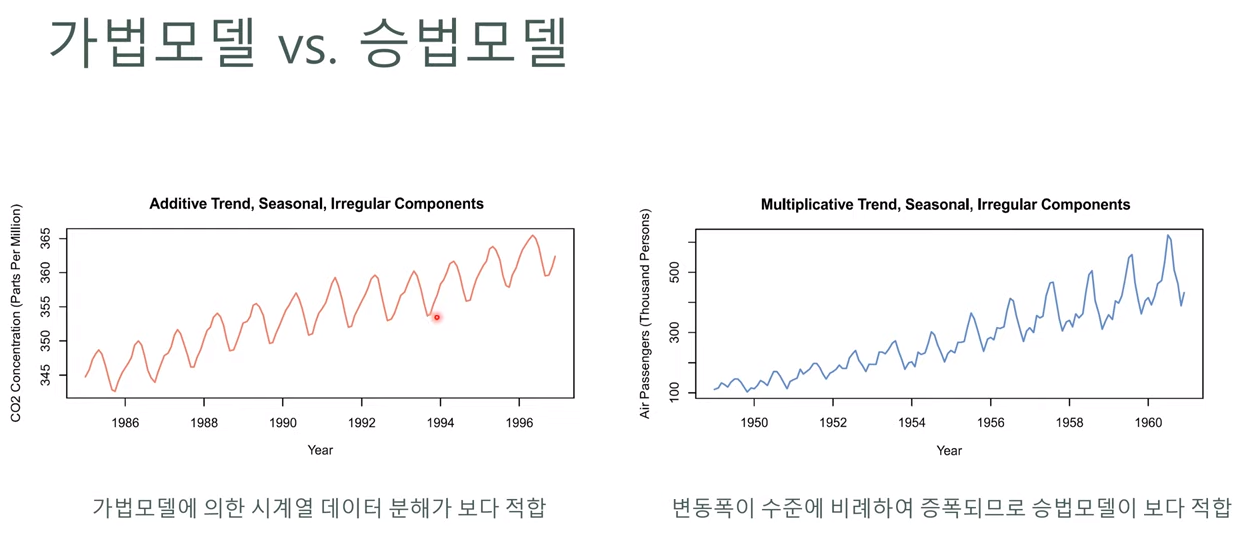

In [ ]:
co2

In [ ]:
co2 <- window(co2, start = c(1985, 1), end = c(1996, 12))
co2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1985,344.79,345.82,347.25,348.17,348.74,348.07,346.38,344.51,342.92,342.62,344.06,345.38
1986,346.11,346.78,347.68,349.37,350.03,349.37,347.76,345.73,344.68,343.99,345.48,346.72
1987,347.84,348.29,349.23,350.80,351.66,351.07,349.33,347.92,346.27,346.18,347.64,348.78
1988,350.25,351.54,352.05,353.41,354.04,353.62,352.22,350.27,348.55,348.72,349.91,351.18
1989,352.60,352.92,353.53,355.26,355.52,354.97,353.75,351.52,349.64,349.83,351.14,352.37
1990,353.50,354.55,355.23,356.04,357.00,356.07,354.67,352.76,350.82,351.04,352.69,354.07
1991,354.59,355.63,357.03,358.48,359.22,358.12,356.06,353.92,352.05,352.11,353.64,354.89
1992,355.88,356.63,357.72,359.07,359.58,359.17,356.94,354.92,352.94,353.23,354.09,355.33
1993,356.63,357.10,358.32,359.41,360.23,359.55,357.53,355.48,353.67,353.95,355.30,356.78
1994,358.34,358.89,359.95,361.25,361.67,360.94,359.55,357.49,355.84,356.00,357.59,359.05


In [ ]:
co2.decomp <- stl(co2, s.window = "periodic")
co2.decomp

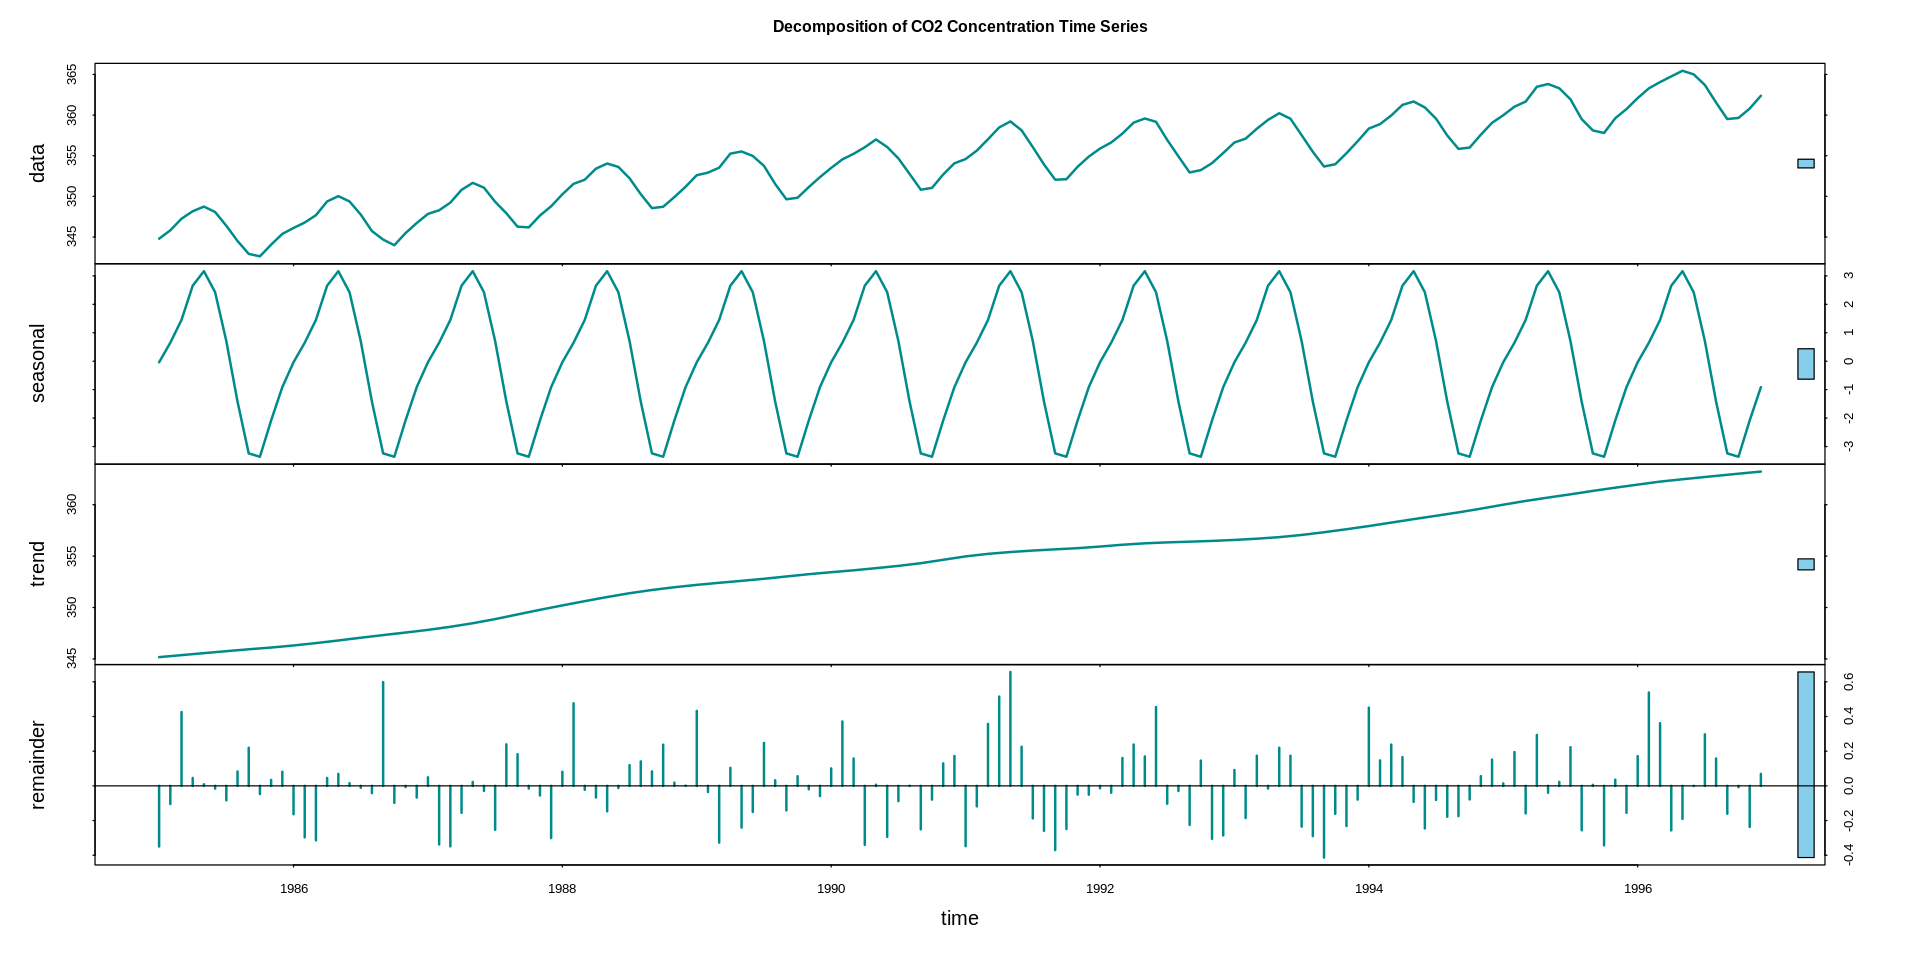

In [ ]:
plot(co2.decomp, col = "darkcyan", col.range='skyblue',
      lwd=2,
      main = "Decomposition of CO2 Concentration Time Series")

In [ ]:
co2.decomp$time.series

In [ ]:
co2.adj = co2 - co2.decomp$time.series[,"seasonal"]
co2.adj

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1985,344.8268,345.1698,345.7987,345.5150,345.5754,345.6457,345.6735,345.9316,346.1605,345.9783,346.1435,346.2913
1986,346.1468,346.1298,346.2287,346.7150,346.8654,346.9457,347.0535,347.1516,347.9205,347.3483,347.5635,347.6313
1987,347.8768,347.6398,347.7787,348.1450,348.4954,348.6457,348.6235,349.3416,349.5105,349.5383,349.7235,349.6913
1988,350.2868,350.8898,350.5987,350.7550,350.8754,351.1957,351.5135,351.6916,351.7905,352.0783,351.9935,352.0913
1989,352.6368,352.2698,352.0787,352.6050,352.3554,352.5457,353.0435,352.9416,352.8805,353.1883,353.2235,353.2813
1990,353.5368,353.8998,353.7787,353.3850,353.8354,353.6457,353.9635,354.1816,354.0605,354.3983,354.7735,354.9813
1991,354.6268,354.9798,355.5787,355.8250,356.0554,355.6957,355.3535,355.3416,355.2905,355.4683,355.7235,355.8013
1992,355.9168,355.9798,356.2687,356.4150,356.4154,356.7457,356.2335,356.3416,356.1805,356.5883,356.1735,356.2413
1993,356.6668,356.4498,356.8687,356.7550,357.0654,357.1257,356.8235,356.9016,356.9105,357.3083,357.3835,357.6913
1994,358.3768,358.2398,358.4987,358.5950,358.5054,358.5157,358.8435,358.9116,359.0805,359.3583,359.6735,359.9613


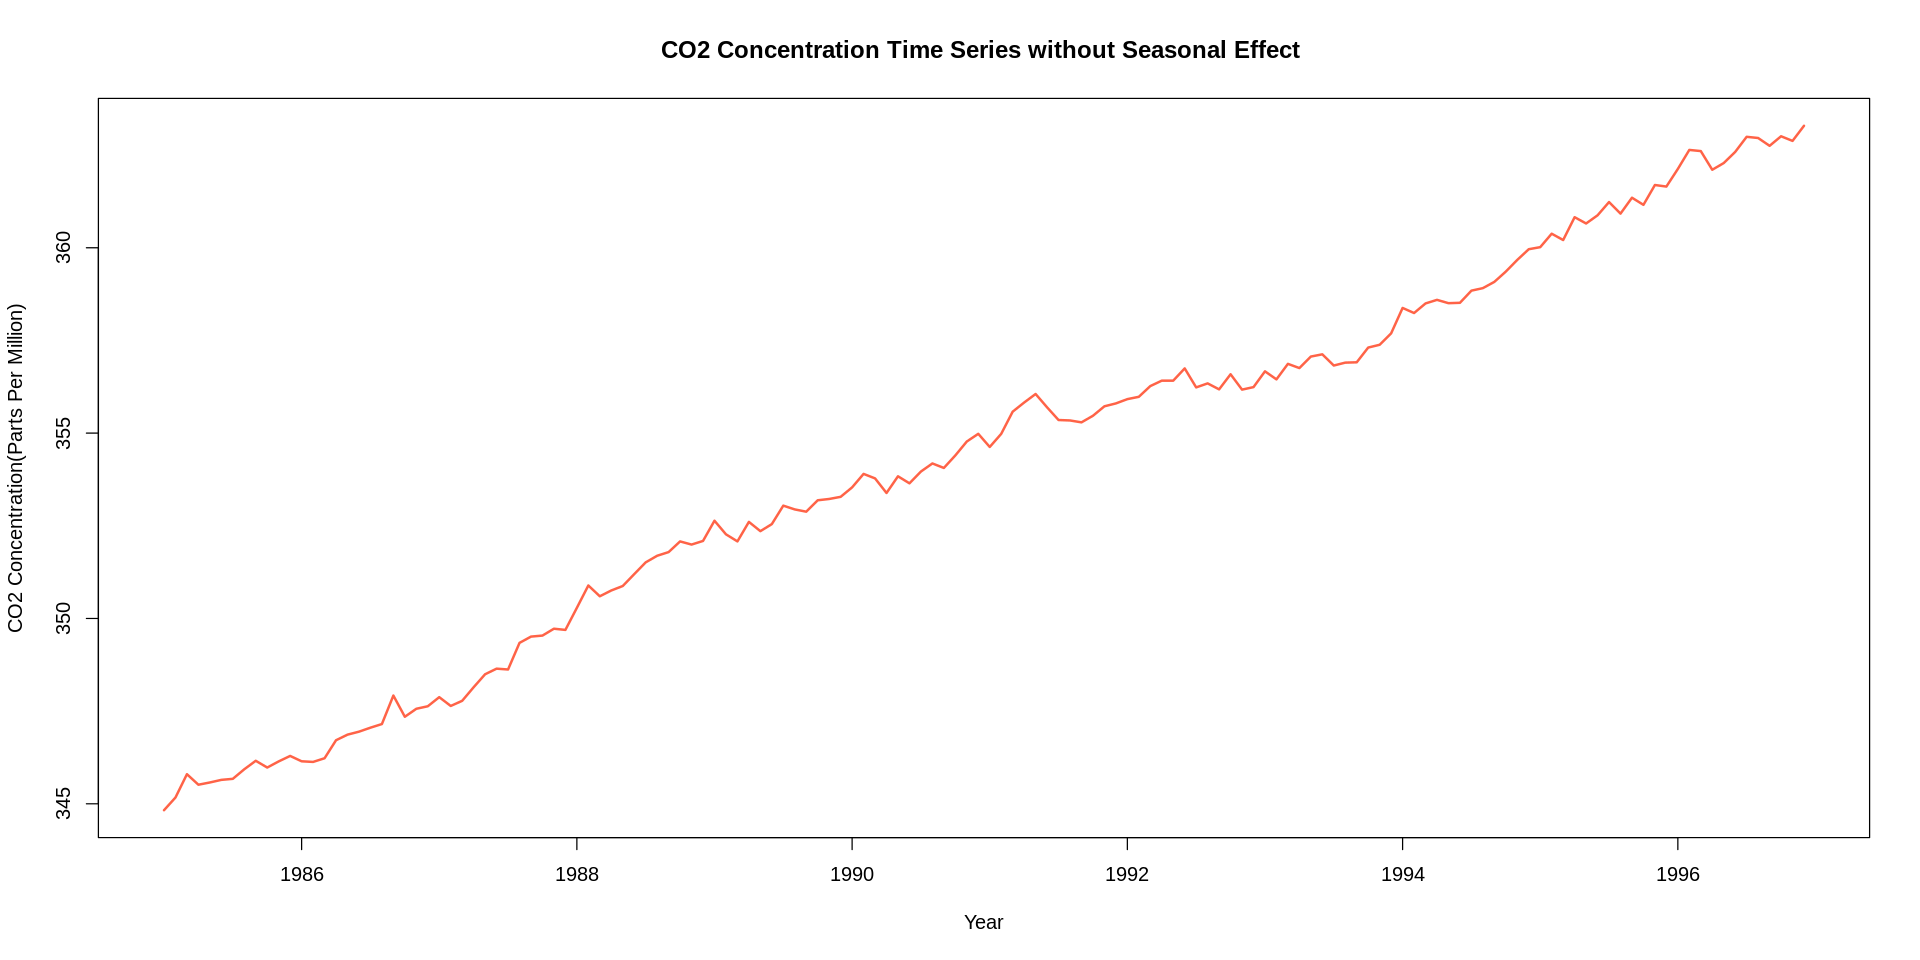

In [ ]:
plot(co2.adj, col = "tomato", lwd=2,
    xlab = "Year", ylab = "CO2 Concentration(Parts Per Million)",
    main = "CO2 Concentration Time Series without Seasonal Effect ")

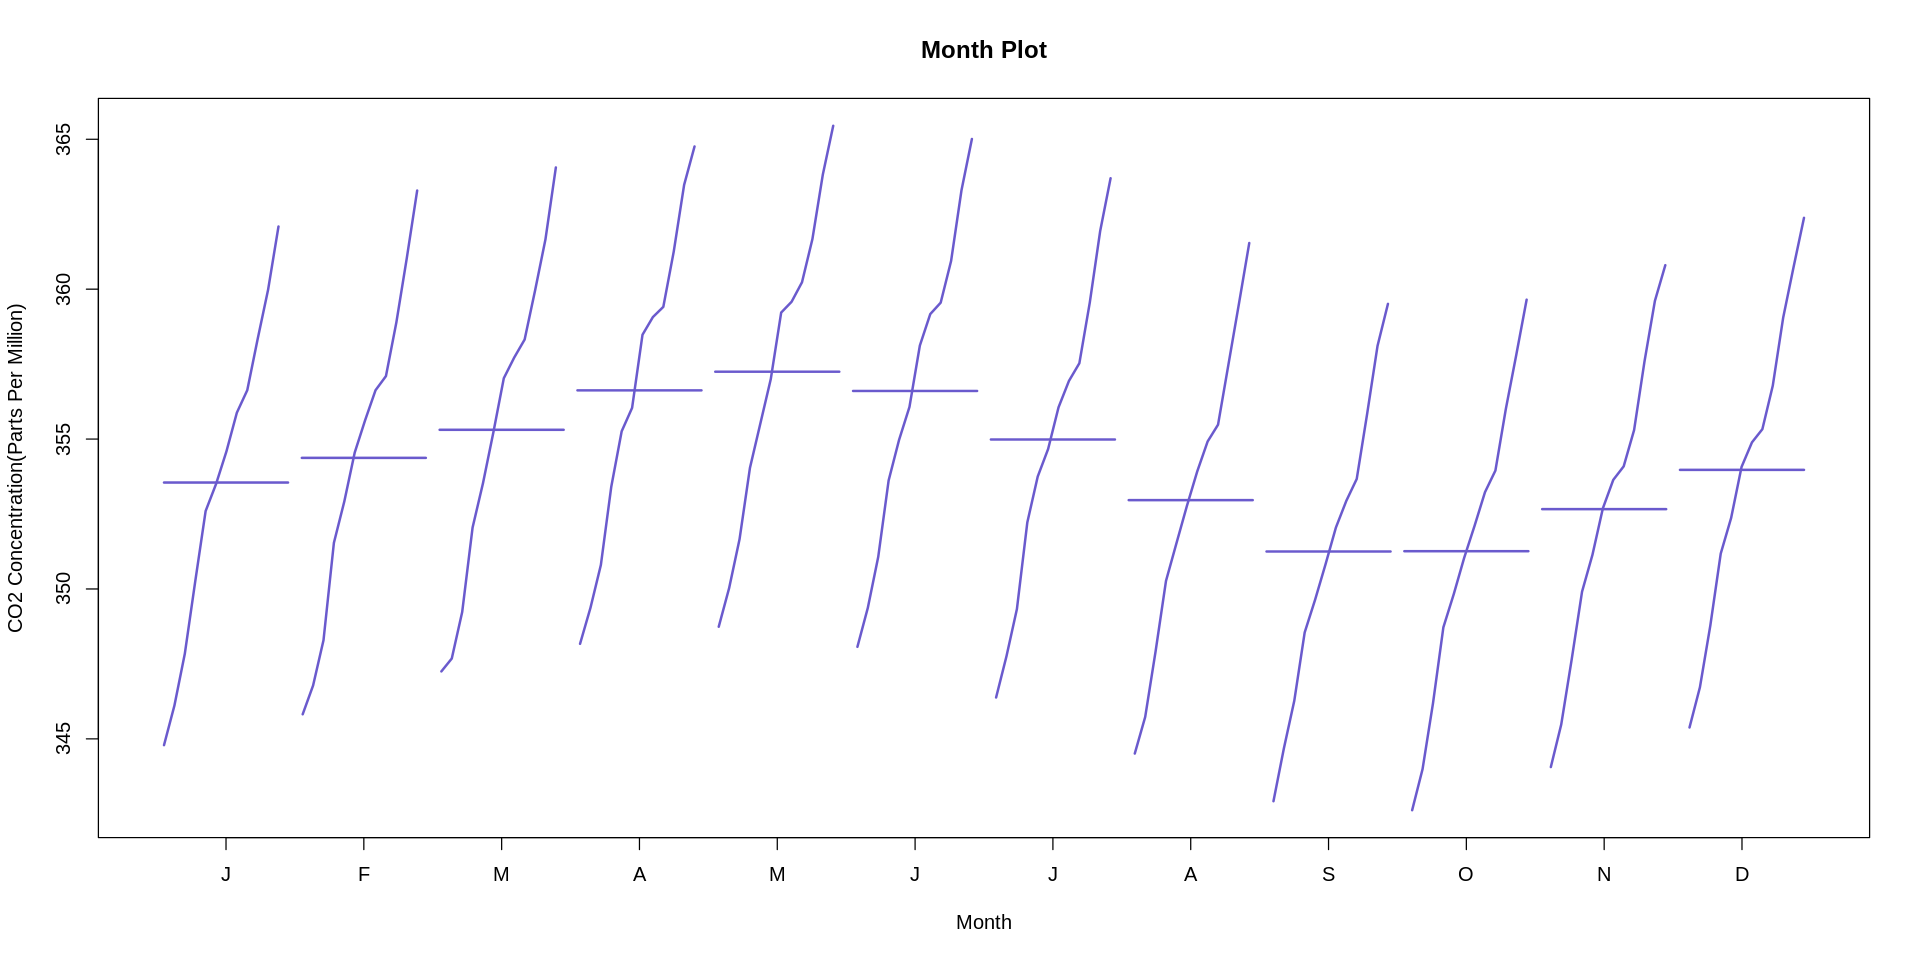

In [ ]:
monthplot(co2, col = "slateblue", lwd = 2,
          xlab = "Month", ylab = "CO2 Concentration(Parts Per Million)",
          main = "Month Plot")

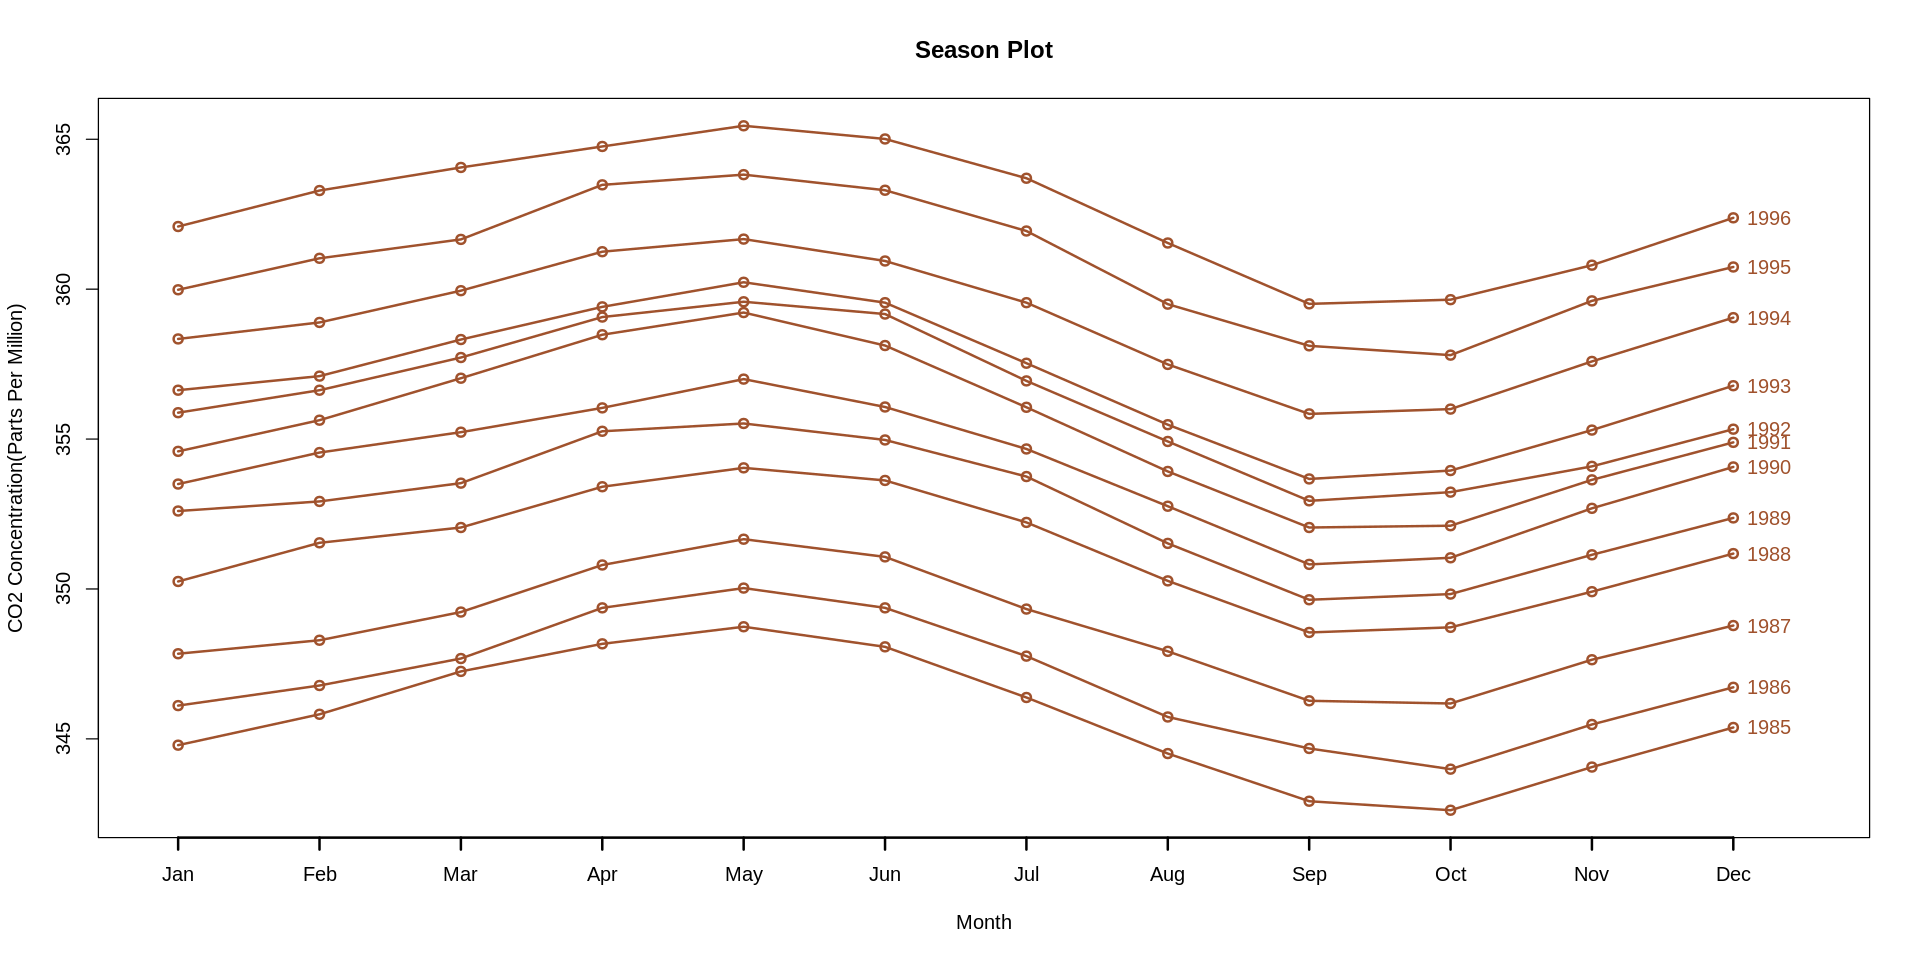

In [ ]:
seasonplot(co2, col = "sienna", lwd = 2, year.labels = TRUE,
          xlab = "Month", ylab = "CO2 Concentration(Parts Per Million)",
          main = "Season Plot")

- 모두 4월과 5월에 co2 농도가 다른 월에  비해서 높습니다.
- 그리고 9월과 10월에 co2 농도가 다른 월보다 상대적으로 낮다는 것을 확인할 수 있습니다.

  
---


- 12월 데이터의 성분분해를 위해 지금 사용하고 있는 stl함수는 가법 모델만을 지원하는 한계가 있습니다.
- 하지만 이는 크게 문제가 되지 않습니다.
- 왜냐하면 앞서 살펴봤듯이 승법모델은 로그변환을 통해 가법 모데롤 변환할 수 있기 때문입니다.
- 로그로 변환된 시계열 데이터에 대해 가법모델을 적용해서 분해한 다음 그 결과에 지수함수를 취하여 원래의 척도로 쉽게 되돌릴 수 있습니다.

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


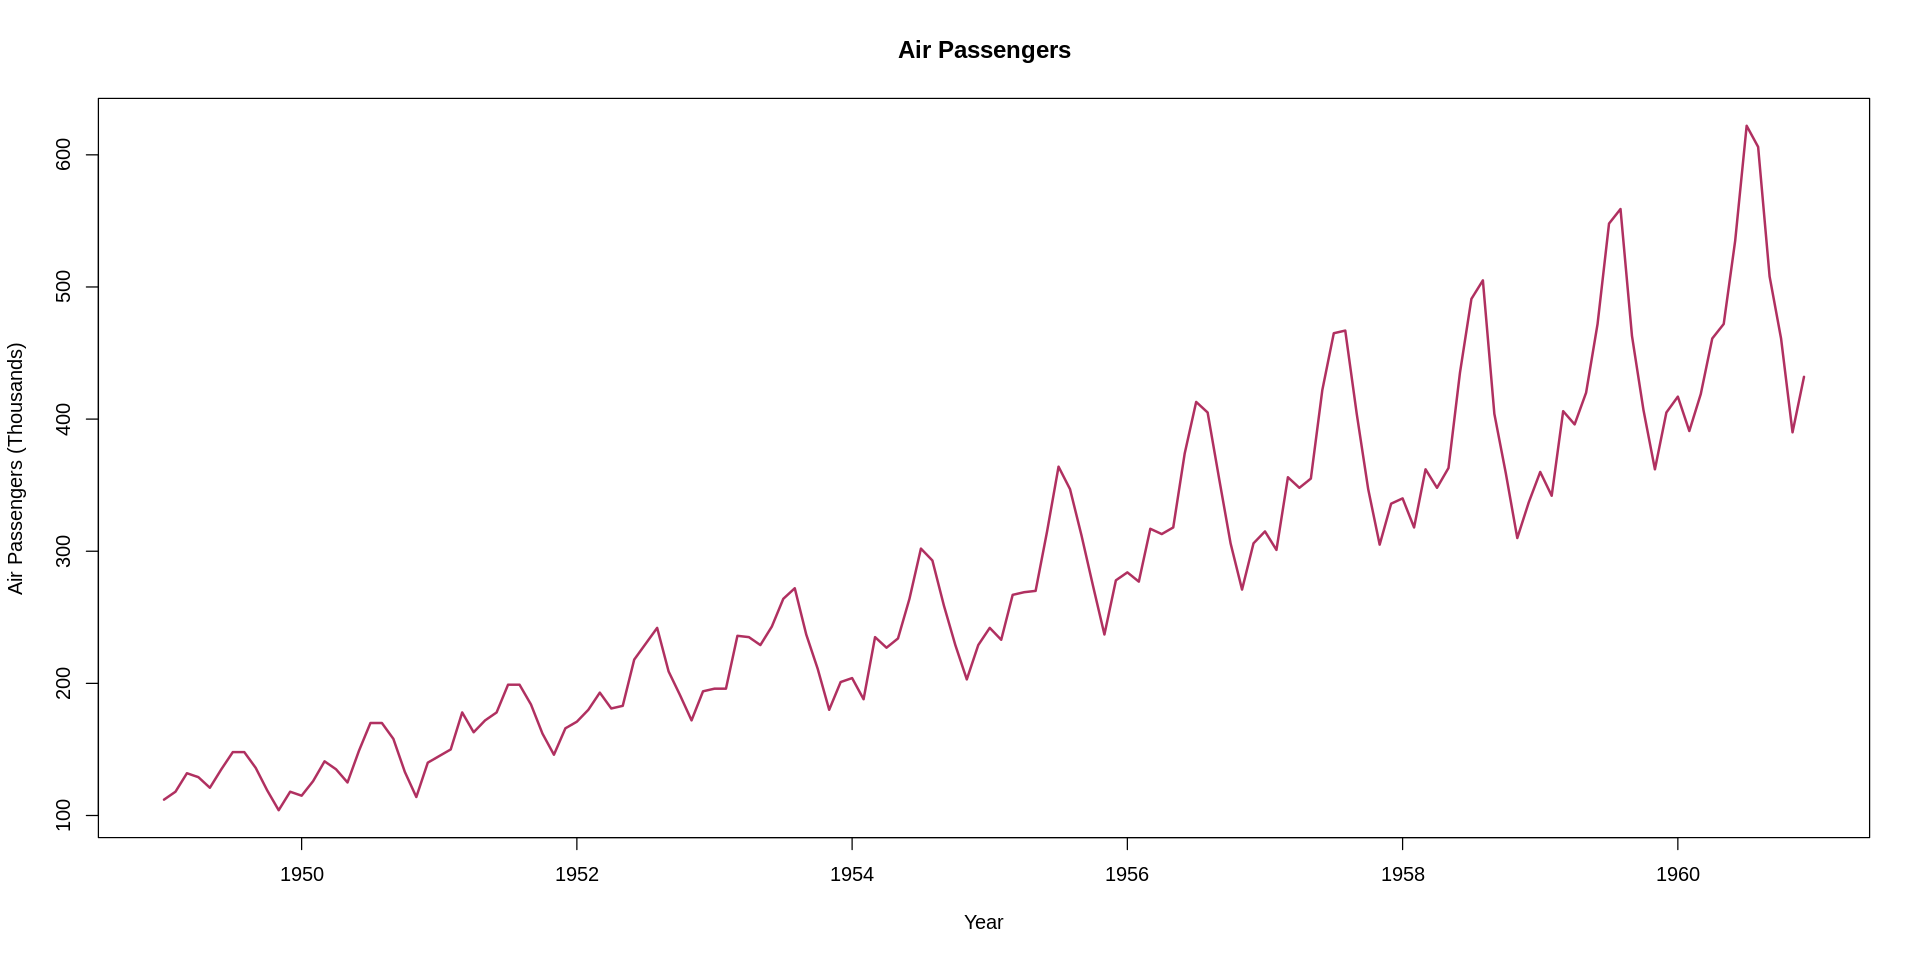

In [ ]:
plot(AirPassengers, col = "maroon", lwd=2,
    xlab = "Year", ylab = "Air Passengers (Thousands)",
    main = "Air Passengers")

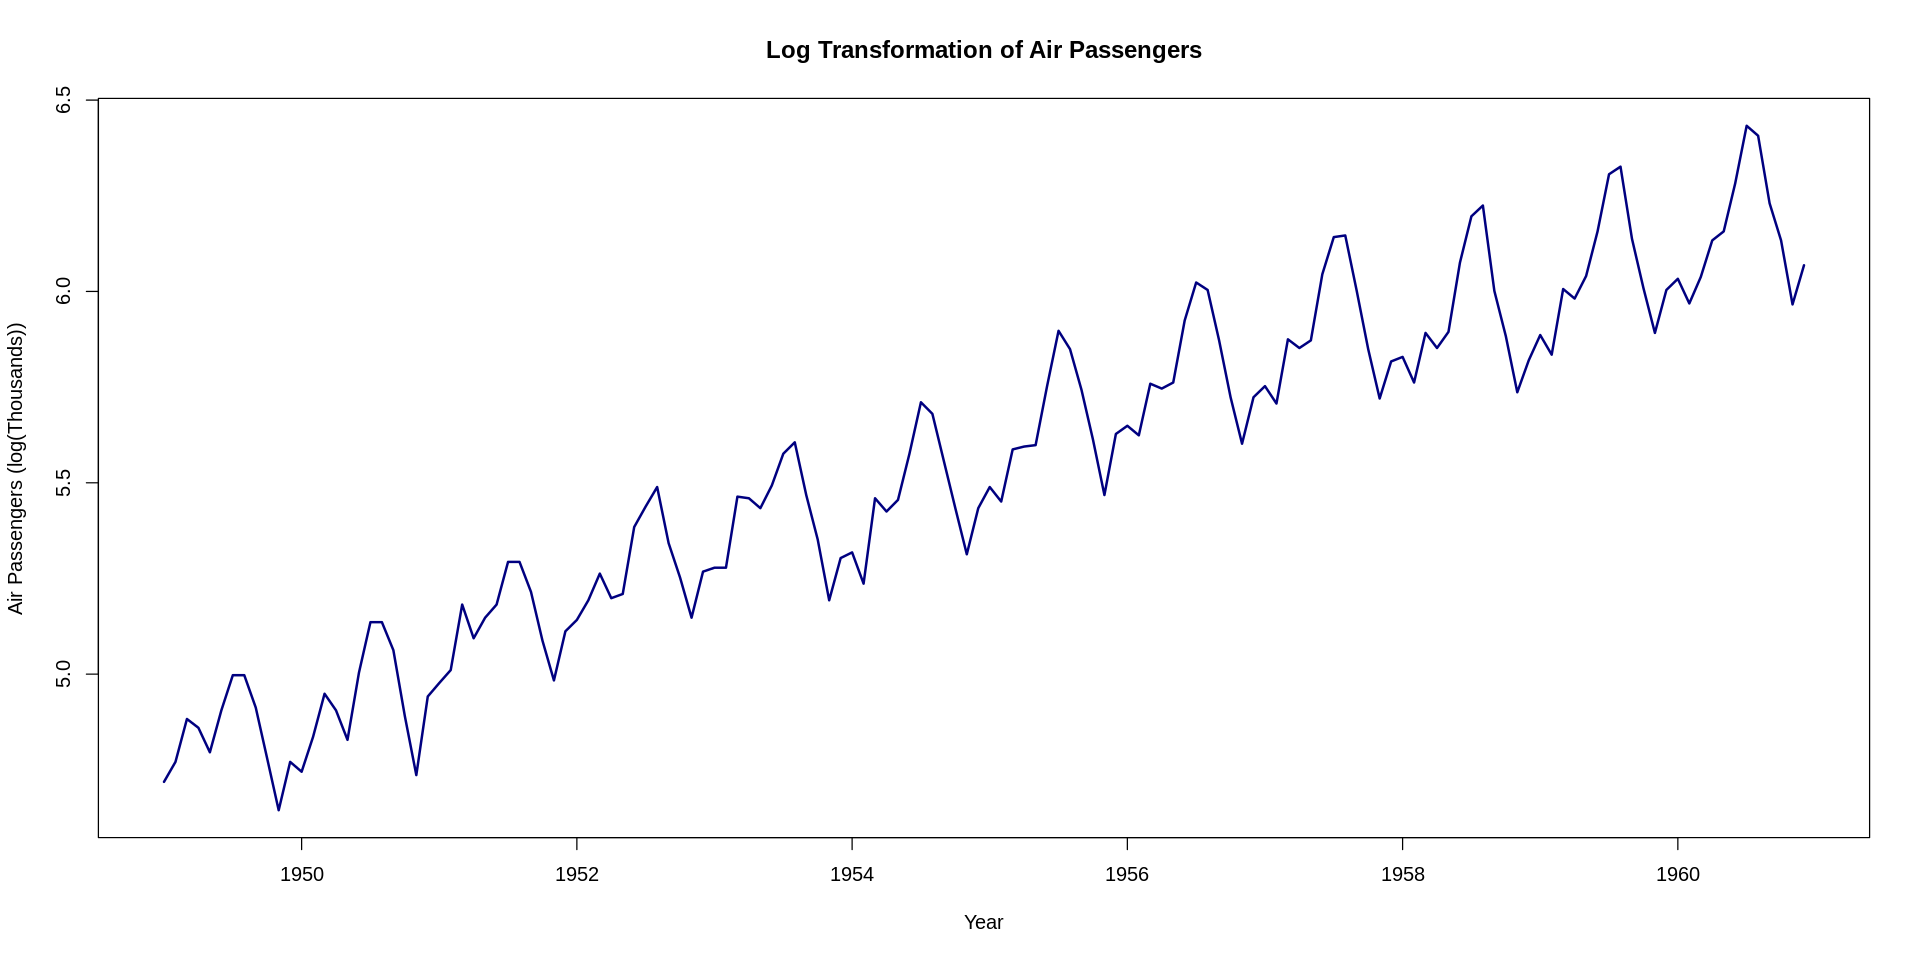

In [ ]:
lair = log(AirPassengers)
plot(lair, col = "navy", lwd=2,
    xlab = "Year", ylab = "Air Passengers (log(Thousands))",
    main = "Log Transformation of Air Passengers")

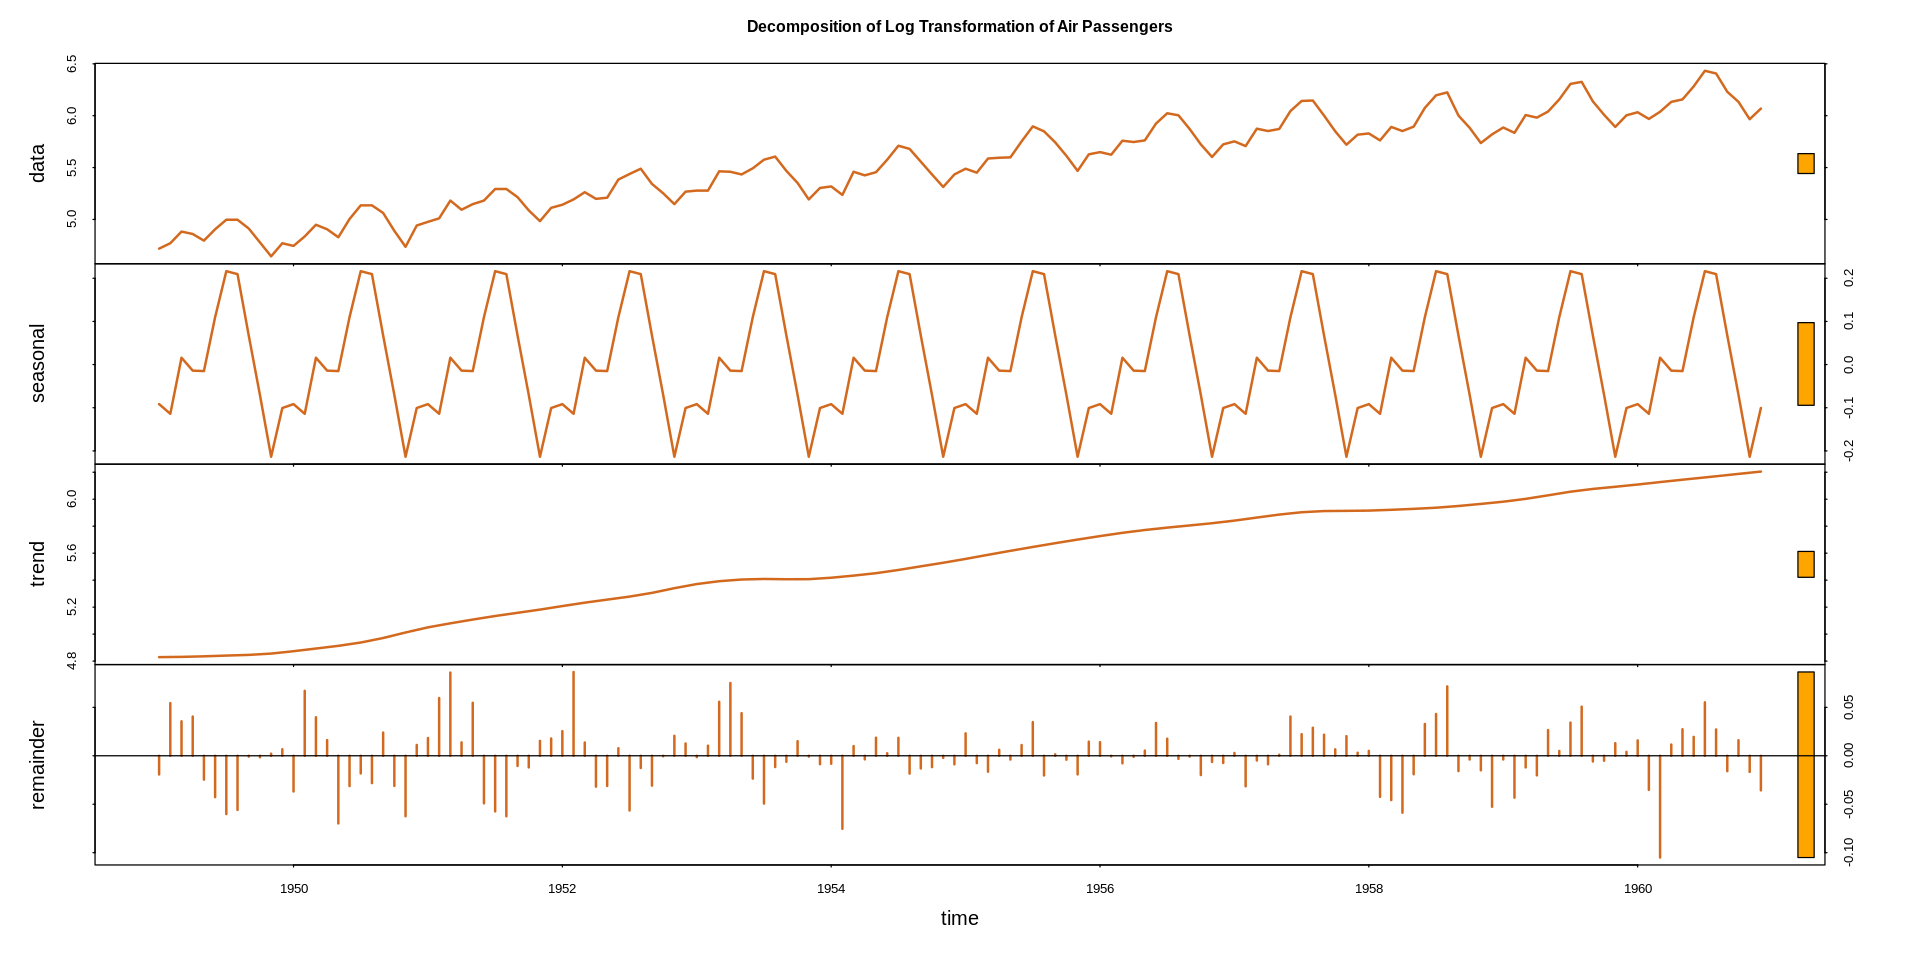

In [ ]:
lair.decomp = stl(lair, s.window = "periodic")
plot(lair.decomp, col = "chocolate", col.range="orange",
      lwd = 2, 
      main = "Decomposition of Log Transformation of Air Passengers" )

In [ ]:
lair.decomp$time.series

In [ ]:
exp(lair.decomp$time.series)

---
> # **2. 지수예측모델** 
--- 
----- < [지수예측모델](https://www.youtube.com/watch?v=38PuZyCsYUw) >   
- **개요**
  - **지수예측모델**(exponential forecasting model)은 단순하면서도 비교적 우수한 단기예측 성능을 보임

- **유형**
  1. **단순지수평활법**(simple exponential smoothing) : 수준 추정
  2. **홀트지수평활법**(Holt exponential smoothing) : 수준, 기울기 추정
  3. **홀트-윈터스지수평활법**(Holt-Winters exponential smoothing) : 수준, 기울기, 계절 요인 추정

---
> ## **2-1. forecast::ets( )** 함수를 이용한 지수예측모델 생성
- 불규칙, 추세, 계절 성분의 결합 방식에 따라 다양한 지수예측모델 생성  
---

1. **단순지수평활법** / *수준*  
```
ets(ts, model = "ANN"), ets(ts, model = "MNN")
```
2. **홀트지수평활법** / *수준, 기울기*  
```
ets(ts, model = "AAN"), ets(model = "MAN")
```
3. **홀트-윈터스지수평활법** / *수준, 기울기, 계절* 
```
ets(ts, model = "AAA"), ets(ts, model="AAM")
ets(ts, model = "MAA"), ets(ts, model="MAM")
```

$( A : 가법모델 /  M : 승법모델 / N : 불포함 / Z : 가법|승법모델 자동 선택 )$    
  
- ANN : 불규칙 성분만이 수준과 가법적을 결합하는 시계열 예측모델  
- MMM : 불규칙, 추세, 계절 성분 모두 승법적으로 결합하는 시계열 예측모델

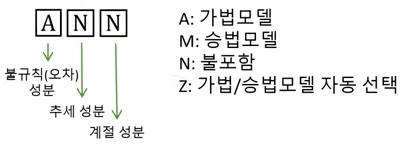

---
> ## **2-2. 단순지수평활법**
---
   
1. **개요**
  - 시계열 데이터가 전반적으로 일정 크기(즉 불변의 수준)를 갖고 있고 추세나 계절적 요인이 없을 경우 사용

  - 추세나 계절 성분은 없으며 오로지 수준과 불규칙적인 오차에 의해 관측값이 결정됨  

2. **수식**  
$$y_t = Level + I_t$$  

  - 여기에서, $y_t$는 $t$시점에서의 관측값,
  - $Level$은 시계열의 전반적 수준(크기)
  - $I_t$는 $t$시점에서의 불규칙효과에 의한 변동분

3. 방법
  - 관측값의 가중평균을 이용하여 예측값 추정
  - 관측값이 평균에 미치는 영향이 시간의 흐름에 따라 지수적으로 감소하는 방식으로 가중치 선택
  - $t + 1$ 시점에서의 예측값은 과거 모든 관측값의 가중평균에 의해 계산

$$ \widehat y_{t+1} = \alpha y_t + \alpha(1 - \alpha)y_{t-1} + \alpha(1 - \alpha)^2y_{t-2} + ...  $$

  - 여기에서
    - $\widehat y_{t+1}$ 은 $t+1$ 시점에서의 예측값
    - $y_t$ 는 $t$ 시점에서의 관측값
    - $\alpha(1 - \alpha)^i$ 은 가중치 ( $ i=0,1,2, ... , 0\le\alpha\le1 $ )
    - $\alpha$는 가중치에 대한 붕괴율(decay rate)을 통제하여 가중치가 영향을 미치는 범위를 결정
    - ( $\alpha$가 1에 가까울수록 최근의 관측값에 더 큰 가중치 부여 )


In [ ]:
LakeHuron

A Time Series:
 [1] 580.38 581.86 580.97 580.80 579.79 580.39 580.42 580.82 581.40 581.32
[11] 581.44 581.68 581.17 580.53 580.01 579.91 579.14 579.16 579.55 579.67
[21] 578.44 578.24 579.10 579.09 579.35 578.82 579.32 579.01 579.00 579.80
[31] 579.83 579.72 579.89 580.01 579.37 578.69 578.19 578.67 579.55 578.92
[41] 578.09 579.37 580.13 580.14 579.51 579.24 578.66 578.86 578.05 577.79
[51] 576.75 576.75 577.82 578.64 580.58 579.48 577.38 576.90 576.94 576.24
[61] 576.84 576.85 576.90 577.79 578.18 577.51 577.23 578.42 579.61 579.05
[71] 579.26 579.22 579.38 579.10 577.95 578.12 579.75 580.85 580.41 579.96
[81] 579.61 578.76 578.18 577.21 577.13 579.10 578.25 577.91 576.89 575.96
[91] 576.80 577.68 578.38 578.52 579.74 579.31 579.89 579.96

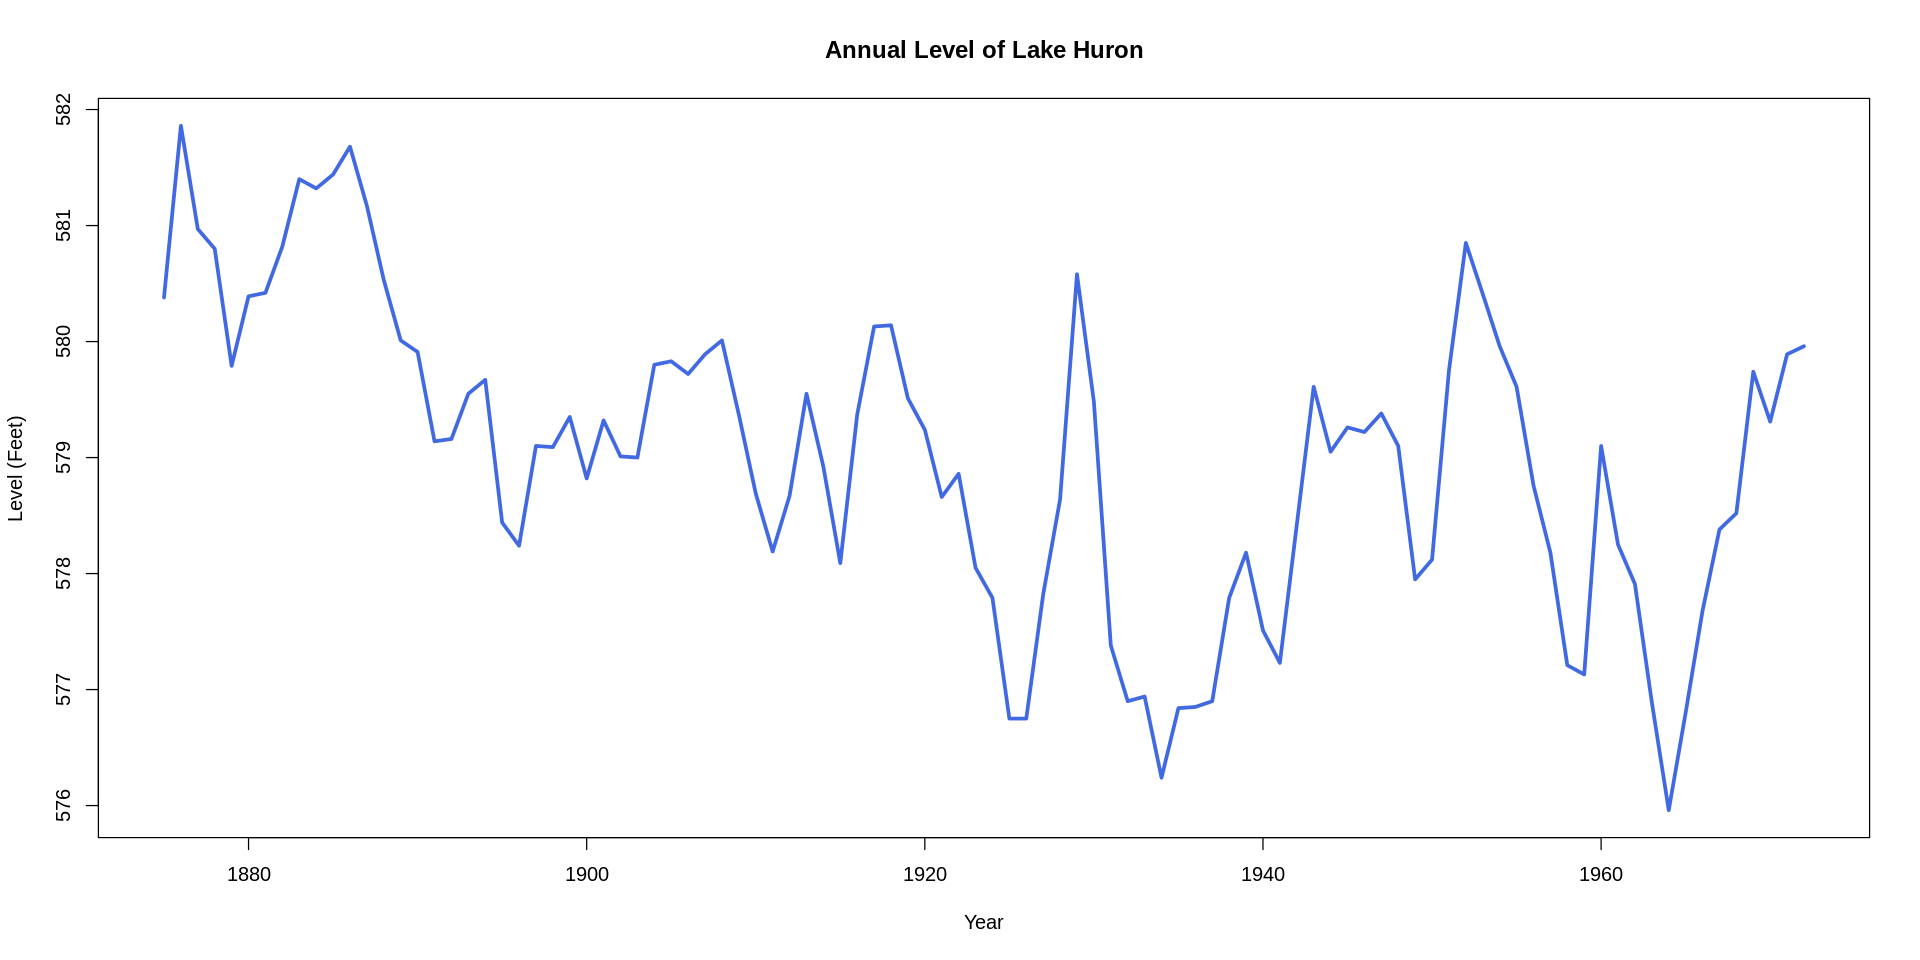

In [ ]:
plot(LakeHuron, col = "royalblue", lwd=3,
    xlab = "Year", ylab = "Level (Feet)",
    main = "Annual Level of Lake Huron")

- 눈에 띄는 상승 추세나 하락 추세 관찰 불가
- 연도별 측정값이기 때문에 계절적 요인 또한 존재하지않음 
- 따라서 여기에서는 수준과 불규칙요인만이 반영된 단순지수평활법을 이용한 시계열분석이 우선 고려할 수 있는 예측방법이 됩니다.

In [ ]:
#install.packages('fpp2')
#install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(fpp2)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
lake.ets = ets(LakeHuron, model = "ANN")
lake.ets

ETS(A,N,N) 

Call:
 ets(y = LakeHuron, model = "ANN") 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 580.3824 

  sigma:  0.7491

     AIC     AICc      BIC 
396.6777 396.9331 404.4326 

- alpha 값이 거의 1에 가까움
  - 매우 큰 알파 값은 최근의 관측값이 예측시 가장 우선적으로 고려된다는 것을 의미!
  - 알파값은 예측 모델의 성능이 최대화 되도록 ets함수에 의해 자동으로 선택됩니다.

In [ ]:
# forecast 함수 적용 -> 예측값을 추정
lake.ets.pred = forecast(lake.ets, h =1)
lake.ets.pred

     Point Forecast Lo 80  Hi 80    Lo 95    Hi 95
1973         579.96   579 580.92 578.4918 581.4281

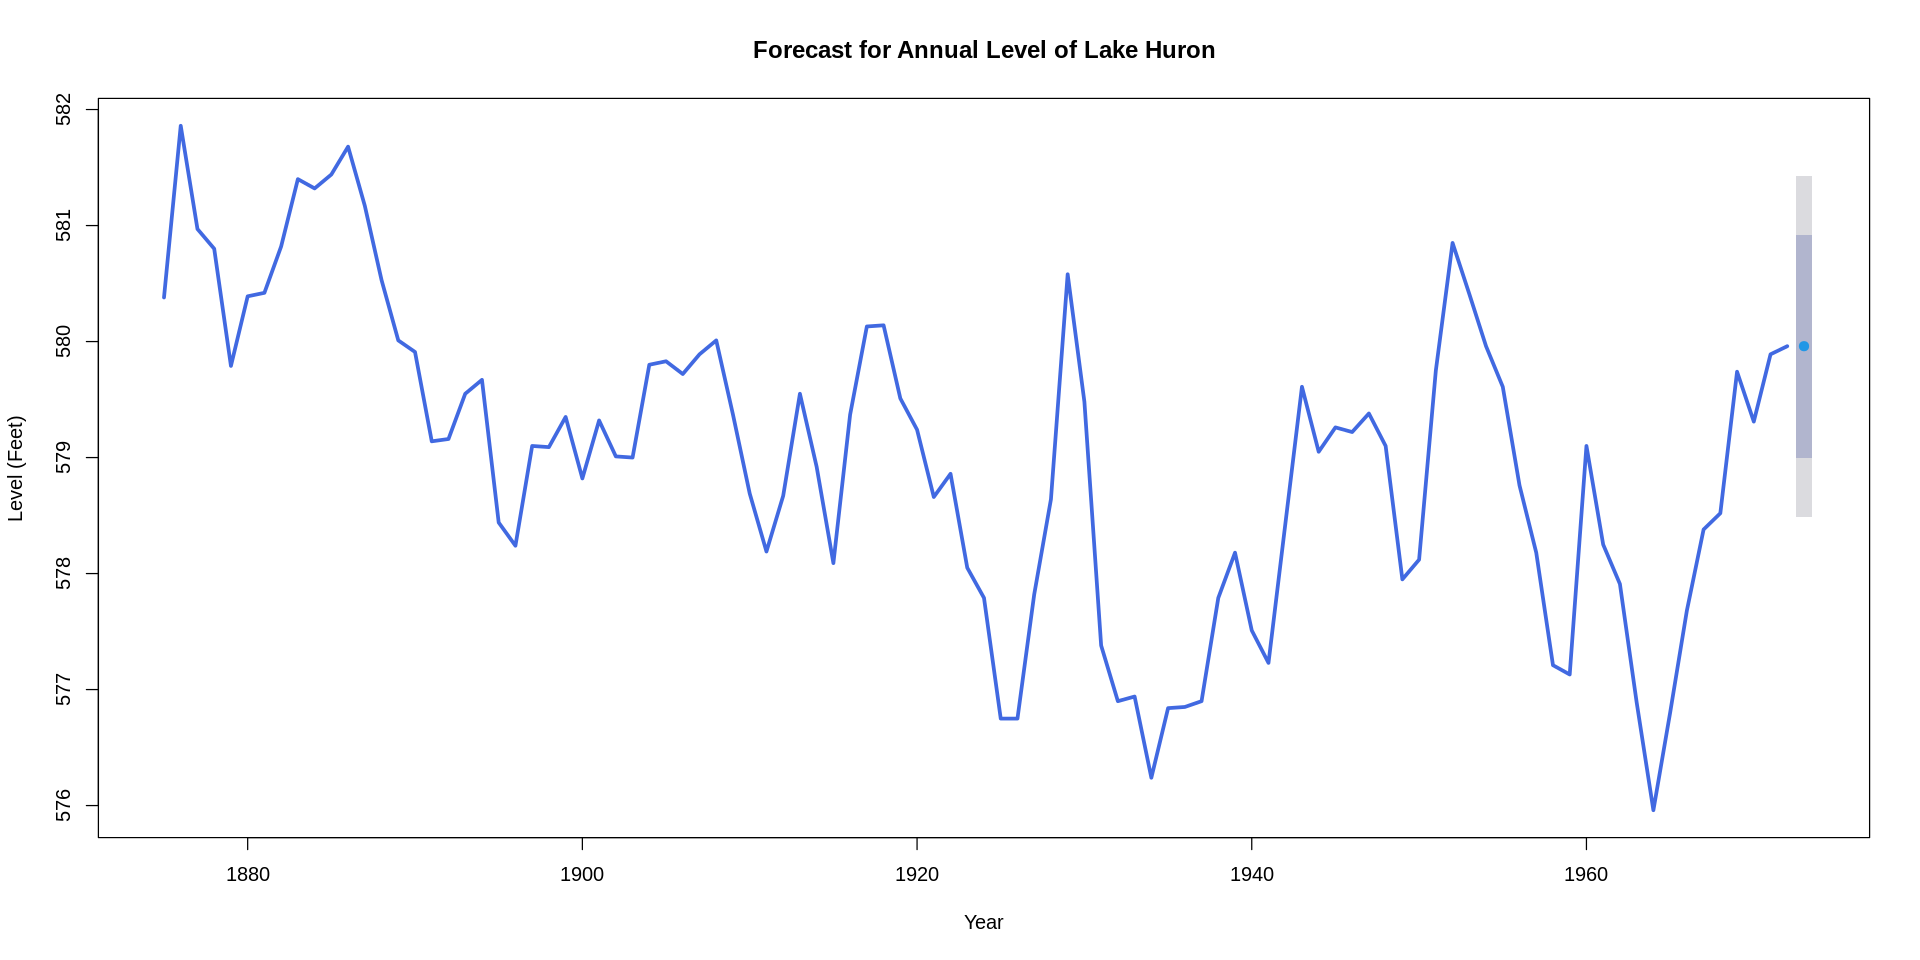

In [ ]:
plot(lake.ets.pred, col = "royalblue", lwd=3,
    xlab = "Year", ylab = "Level (Feet)",
    main = "Forecast for Annual Level of Lake Huron")

In [ ]:
# 예측모델의 성능은 accuracy 함수를 이용해서 확인해볼 수 있습니다.
accuracy(lake.ets)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.004310596,0.7413889,0.5796276,-0.00082501,0.1001199,0.9898571,0.1320556


In [ ]:
?accuracy

- 예측정확도 지표 가운데 RMSE는 가장 널리 사용되는 정확도 지표
- 하지만, 예측 정확도를 대표할 수 있는 단일지표는 없기 때문에 예측정확도를 평가할 때는 일반적으로 이 지표들은 모두 종합적으로 고려합니다.

---
> ## **2-3. 예측정확도**
---
   
1. **RMSE** (root mean squared error)
$$ \sqrt{\frac{1}{T}\sum_{t=1}^T (y_t - \widehat y_{t})^2} $$

2. **MAE** (mean absolute error)
$$ \frac{1}{T} \sum_{t=1}^T \left\vert y_t - \widehat y_{t} \right\vert$$

3. **MAPE** (mean absolute percentage error)
$$ \frac{1}{T}\sum_{t=1}^T  \left\vert \frac{y_t - \widehat y_{t}}{y_t} \times 100 \right\vert $$

- RMSE : 관측값과 예측값의 차이를 제곱해서 모두 합산한 다음 표본크기로 나누고 제곱근을 취해서 구할 수 있습니다.
- MAE : 예측오차의 절대값을 모두 합산해서 표본크기로 나누어 계산합니다.
- MAPE : 예측오차를 퍼센트로 환산해서 예측정확도를 측정합니다.

4. **ACF1**
  - 잔차와의 자기상관
  - 예측모델이 적절하여 더 이상 개선의 여지가 없다면 잔차간 상관계수는 0이어야 한다.
  - 따라서 ACF1이 0에 가까울수록 우수한 모델임

---
> ## **2-3. 홀트지수평활법**
---
   
1. **개요**
  - 수준과 추세(기울기)로 설명되는 시계열 데이터를 예측
  - 수준, 불규칙적인 오차, 추세 성분에 의해 관측값이 결정  

2. **수식**  
$$y_t = Level + Slope \times I_t$$  

  - 여기에서, $y_t$는 $t$시점에서의 관측값
  - $Level$은 시계열의 전반적 수준(크기), $Slope$는 시계열의 기울기
  - $I_t$는 $t$시점에서의 불규칙효과에 의한 변동분

3. 방법
  - $t + 1$ 시점에서의 예측값은 과거 모든 관측값의 가중평균에 의해 계산
    - 수준과 기울기에 대한 두 개의 가중치 필요
    - $\alpha$와 $\beta$는 수준과 기울기에 대한 가중치의 영향력이 미치는 범위를 통제하며 큰 값일수록 최근의 관측값에 더 큰 가중치 부여

In [ ]:
elecsales

A Time Series:
 [1] 2354.34 2379.71 2318.52 2468.99 2386.09 2569.47 2575.72 2762.72 2844.50
[10] 3000.70 3108.10 3357.50 3075.70 3180.60 3221.60 3176.20 3430.60 3527.48
[19] 3637.89 3655.00

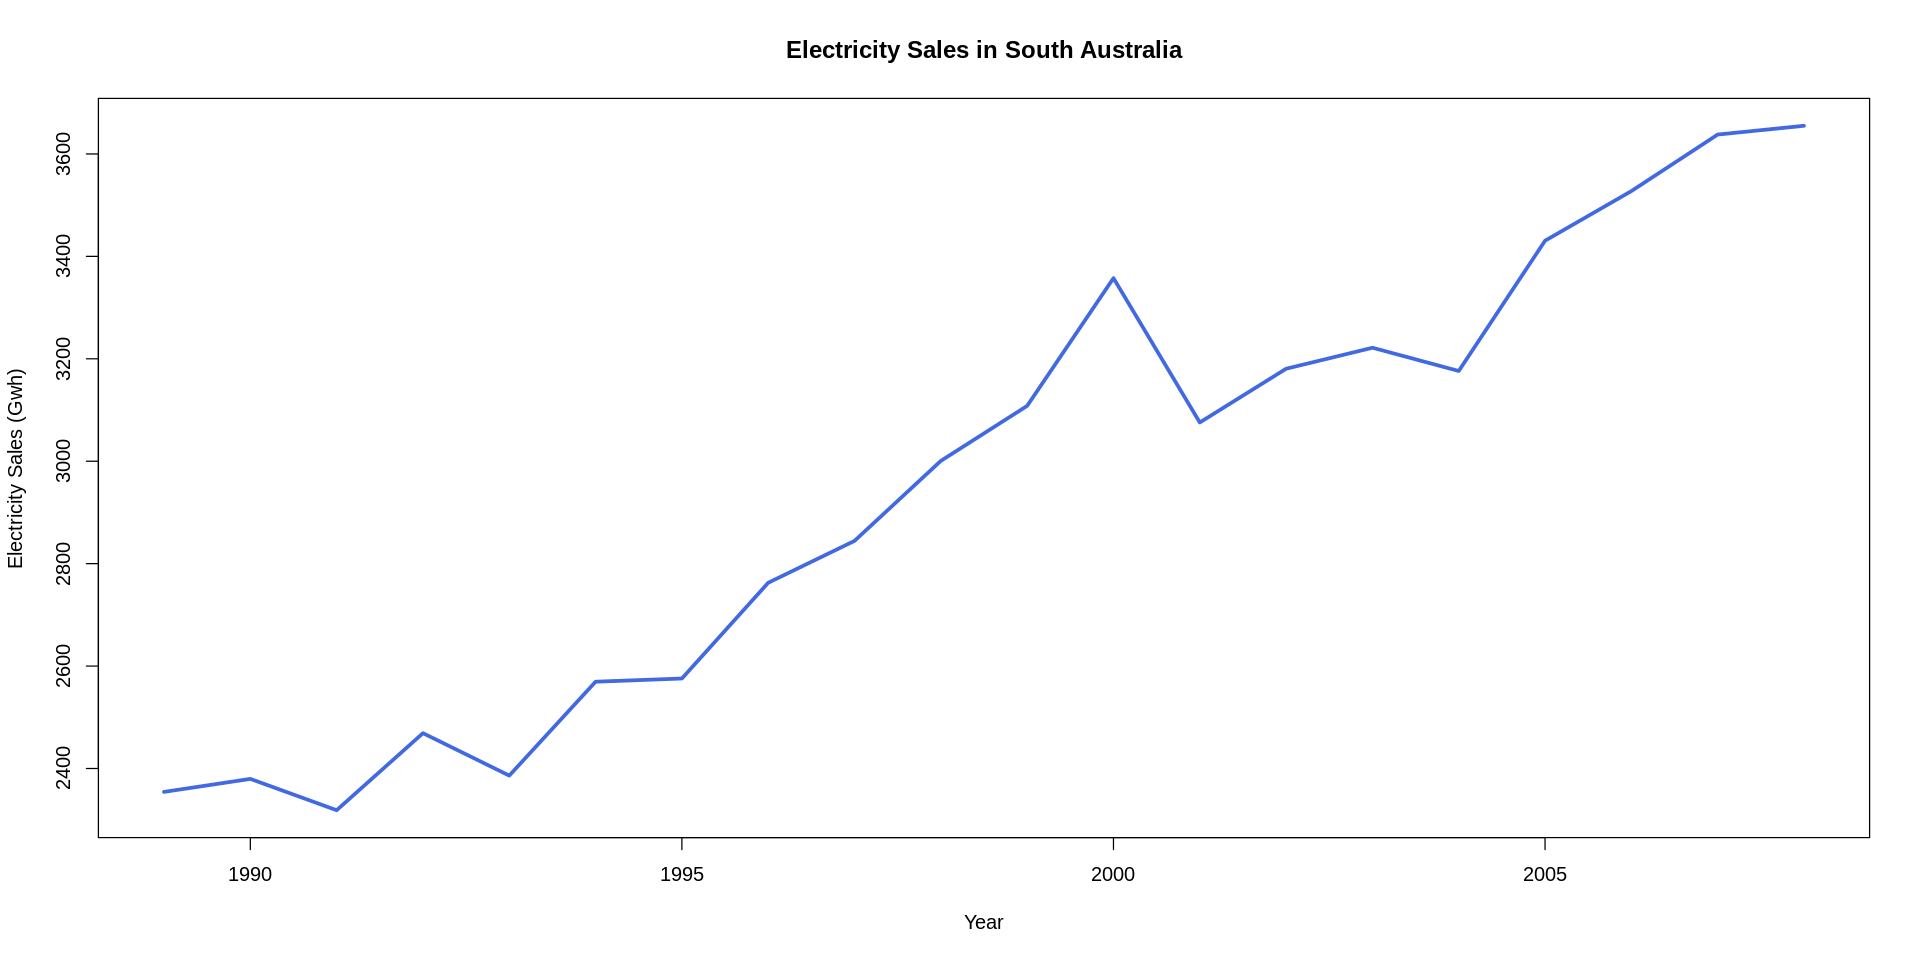

In [ ]:
plot(elecsales, col = "royalblue", lwd = 3,
    xlab = "Year", ylab = "Electricity Sales (Gwh)",
    main = "Electricity Sales in South Australia")

In [ ]:
# 불규칙 : A(가법적), 추세 : A(가법적), 계절 : N(없다)
elecsales.ets = ets(elecsales, model = "AAN")
elecsales.ets

ETS(A,A,N) 

Call:
 ets(y = elecsales, model = "AAN") 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 

  Initial states:
    l = 2173.2178 
    b = 74.0902 

  sigma:  116.2135

     AIC     AICc      BIC 
255.6689 259.9546 260.6476 

- alpha, beta 값이 0 에 가깝다
  - 예측시, 과거의 관측값을 좀 더 우선적으로 고려한다

In [ ]:
# h 5 : 향후 5년간 데이터를 예측
elecsales.ets.pred = forecast(elecsales.ets, h =5)
elecsales.ets.pred

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2009       3729.110 3580.177 3878.044 3501.336 3956.884
2010       3803.201 3654.268 3952.135 3575.427 4030.975
2011       3877.292 3728.359 4026.226 3649.518 4105.066
2012       3951.383 3802.450 4100.317 3723.609 4179.157
2013       4025.474 3876.540 4174.408 3797.700 4253.248

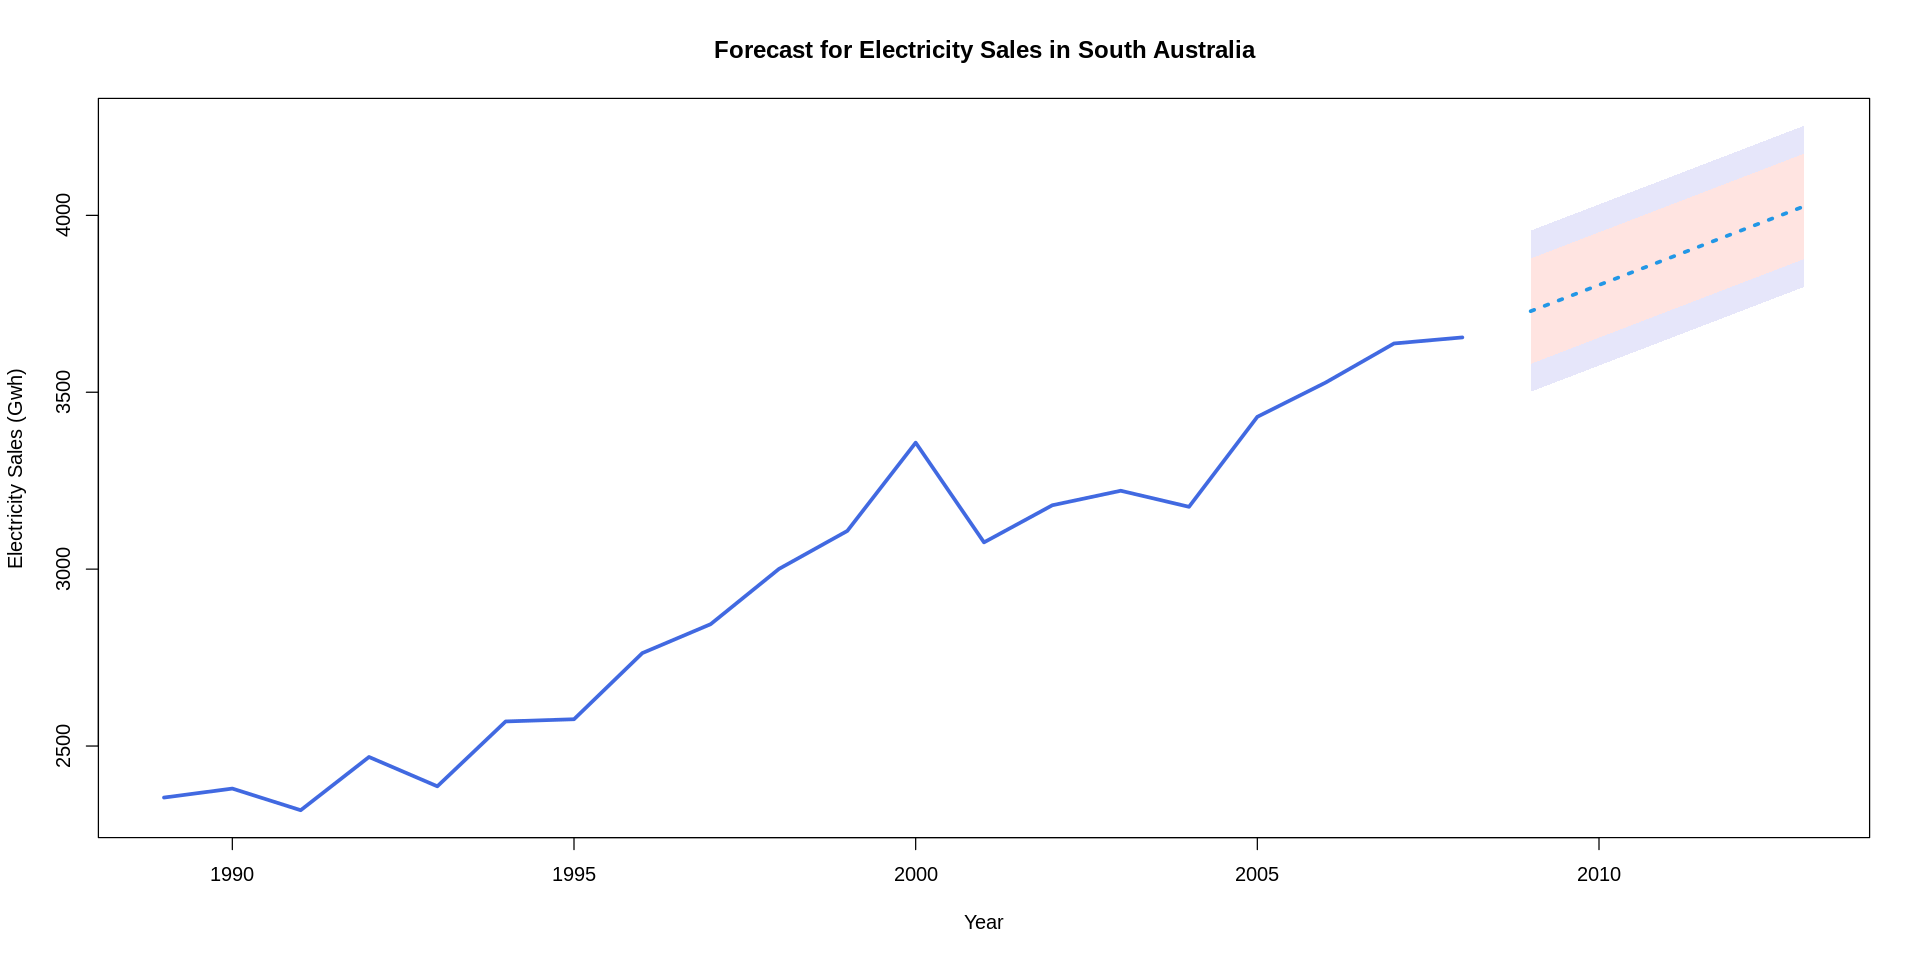

In [ ]:
plot(elecsales.ets.pred, col = "royalblue", lwd = 3,
    flty = 3, flwd = 3, shadecols = c("lavender", "mistyrose"),
    xlab = "Year", ylab = "Electricity Sales (Gwh)",
    main = "Forecast for Electricity Sales in South Australia")

---
> ## **2-4. 홀트-윈터스지수평활법**
---
   
1. **개요**
  - 수준과 추세(기울기),계절로 설명되는 시계열 데이터를 예측
  - 수준, 불규칙적인 오차, 추세, 계절 성분에 의해 관측값이 결정  

2. **수식**  
$$y_t = Level + Slope \times t + S_t + I_t$$  

  - 여기에서, $y_t$는 $t$시점에서의 관측값
  - $Level$은 시계열의 전반적 수준(크기), $Slope$는 시계열의 기울기
  - $S_t$는 $t$시점에서의 계절효과에 의한 변동분
  - $I_t$는 $t$시점에서의 불규칙효과에 의한 변동분

3. 방법
  - $t + 1$ 시점에서의 예측값은 과거 모든 관측값의 가중평균에 의해 계산
    - 수준, 기울기, 계절에 대한 세 개의 가중치 필요
    - $\alpha$, $\beta$, $\gamma$는 수준,기울기,계절에 대한 가중치의 영향력이 미치는 범위를 통제하며 큰 값일수록 최근의 관측값에 더 큰 가중치 부여

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


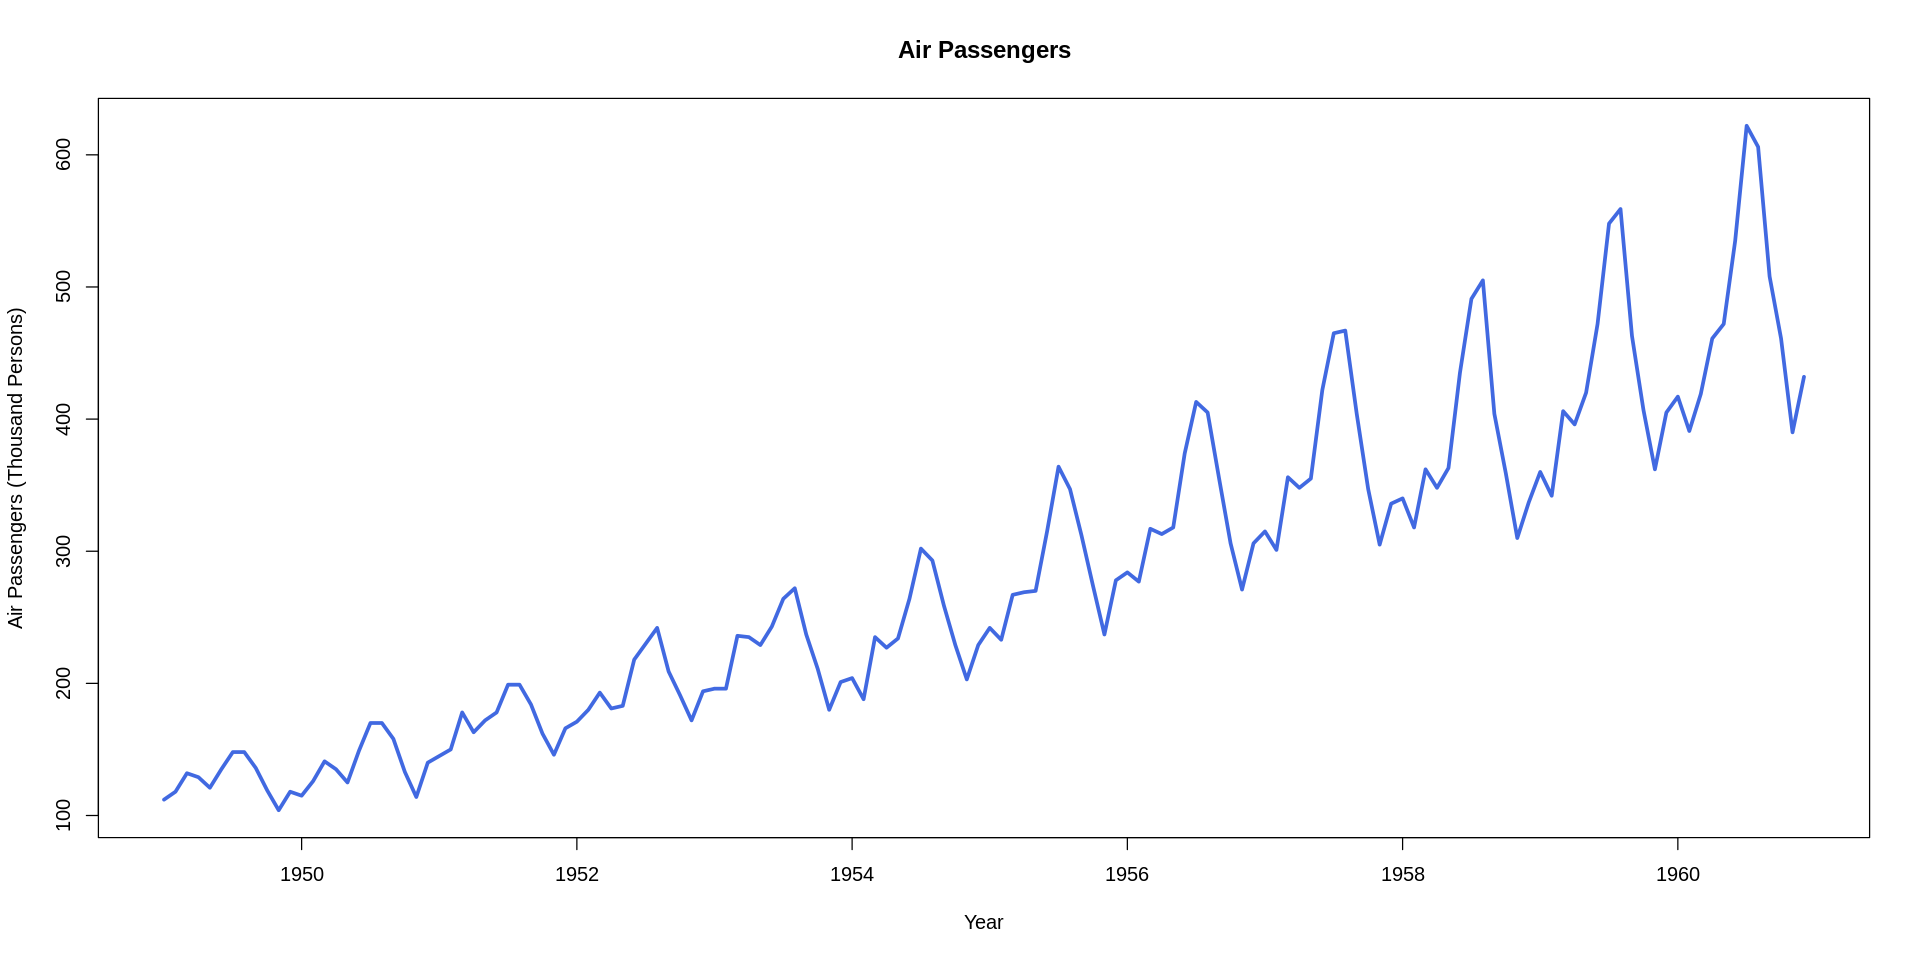

In [ ]:
plot(AirPassengers, col = "royalblue", lwd = 3,
    xlab = "Year", ylab = "Air Passengers (Thousand Persons)",
    main = "Air Passengers")

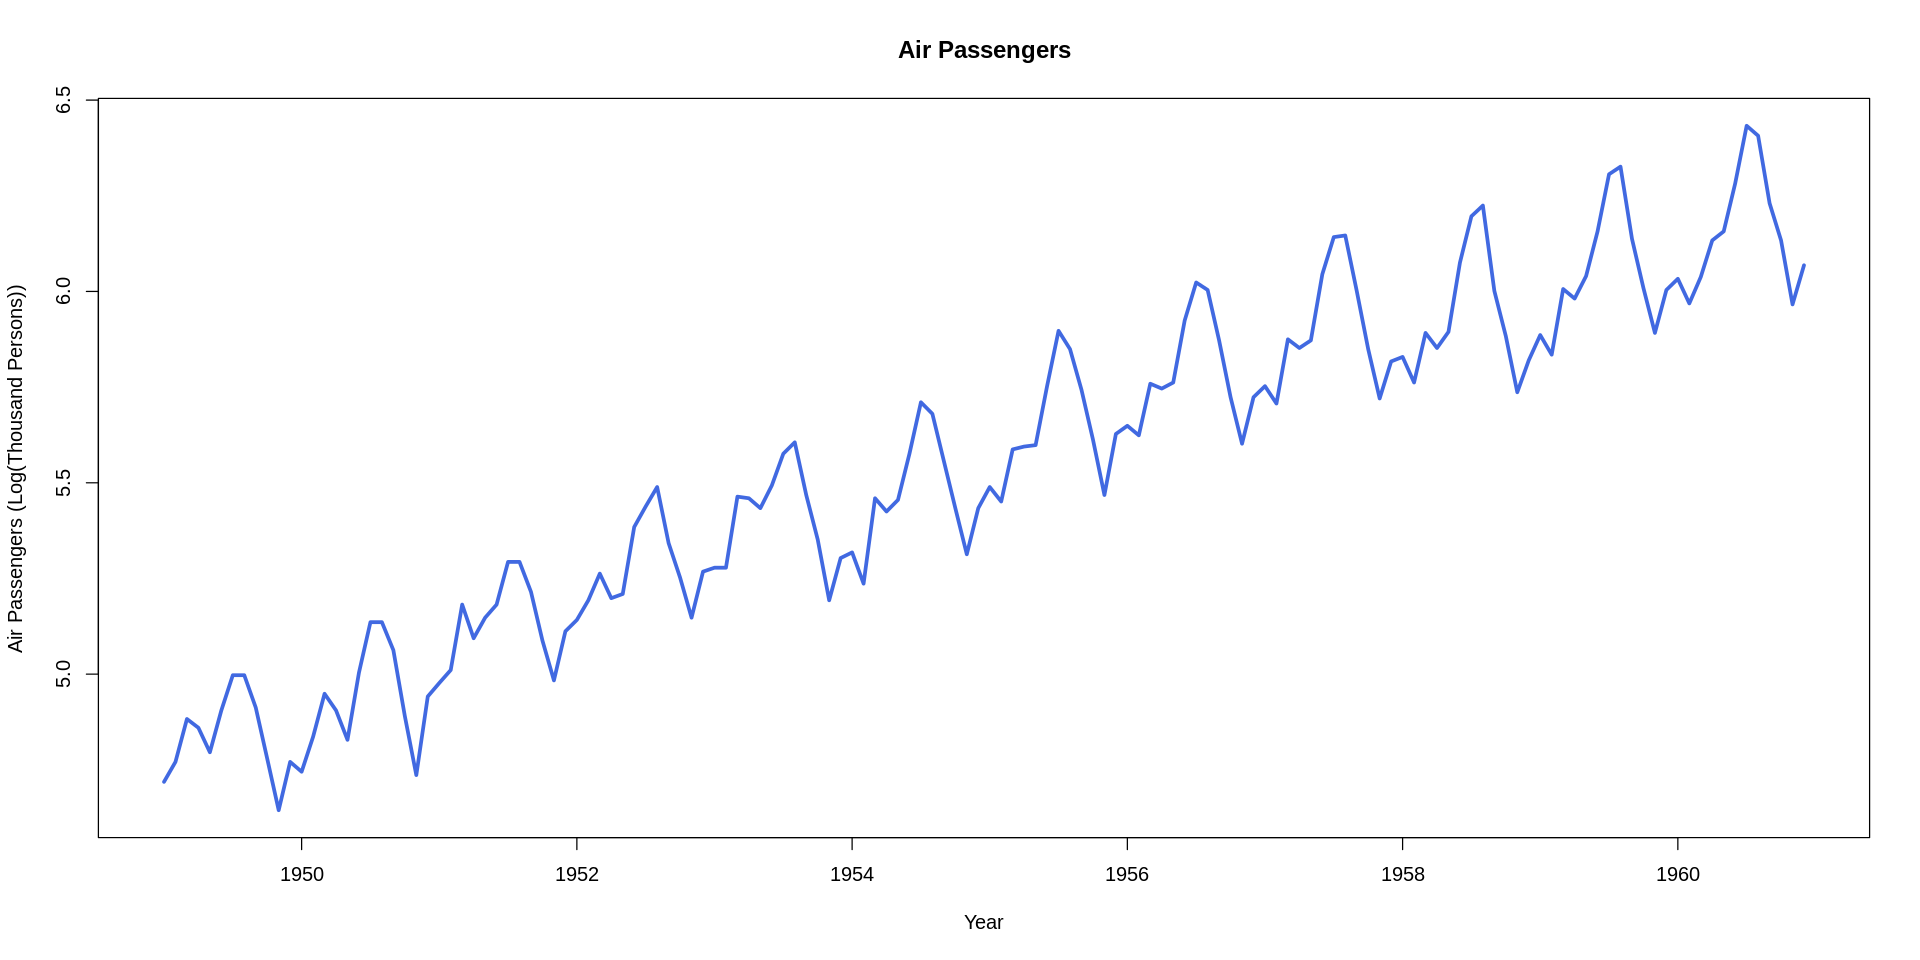

In [ ]:
lair = log(AirPassengers)
plot(lair, col = "royalblue", lwd = 3,
    xlab = "Year", ylab = "Air Passengers (Log(Thousand Persons))",
    main = "Air Passengers")

In [ ]:
lair.ets = ets(lair, model = "AAA")
lair.ets

ETS(A,A,A) 

Call:
 ets(y = lair, model = "AAA") 

  Smoothing parameters:
    alpha = 0.6975 
    beta  = 0.0031 
    gamma = 1e-04 

  Initial states:
    l = 4.7925 
    b = 0.0111 
    s = -0.1045 -0.2206 -0.0787 0.0562 0.2049 0.2149
           0.1146 -0.0081 -0.0059 0.0225 -0.1113 -0.0841

  sigma:  0.0383

      AIC      AICc       BIC 
-207.1694 -202.3123 -156.6826 

In [ ]:
lair.ets.pred = forecast(lair.ets, h= 12)
lair.ets.pred

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       6.109335 6.060306 6.158365 6.034351 6.184319
Feb 1961       6.092542 6.032679 6.152405 6.000989 6.184094
Mar 1961       6.236626 6.167535 6.305718 6.130960 6.342292
Apr 1961       6.218531 6.141239 6.295823 6.100323 6.336738
May 1961       6.226734 6.141971 6.311498 6.097100 6.356369
Jun 1961       6.359734 6.268049 6.451419 6.219514 6.499954
Jul 1961       6.470379 6.372206 6.568552 6.320237 6.620521
Aug 1961       6.470714 6.366406 6.575023 6.311189 6.630240
Sep 1961       6.332402 6.222252 6.442553 6.163942 6.500863
Oct 1961       6.207747 6.092003 6.323491 6.030732 6.384762
Nov 1961       6.076240 5.955116 6.197363 5.890997 6.261482
Dec 1961       6.202710 6.076393 6.329026 6.009525 6.395894

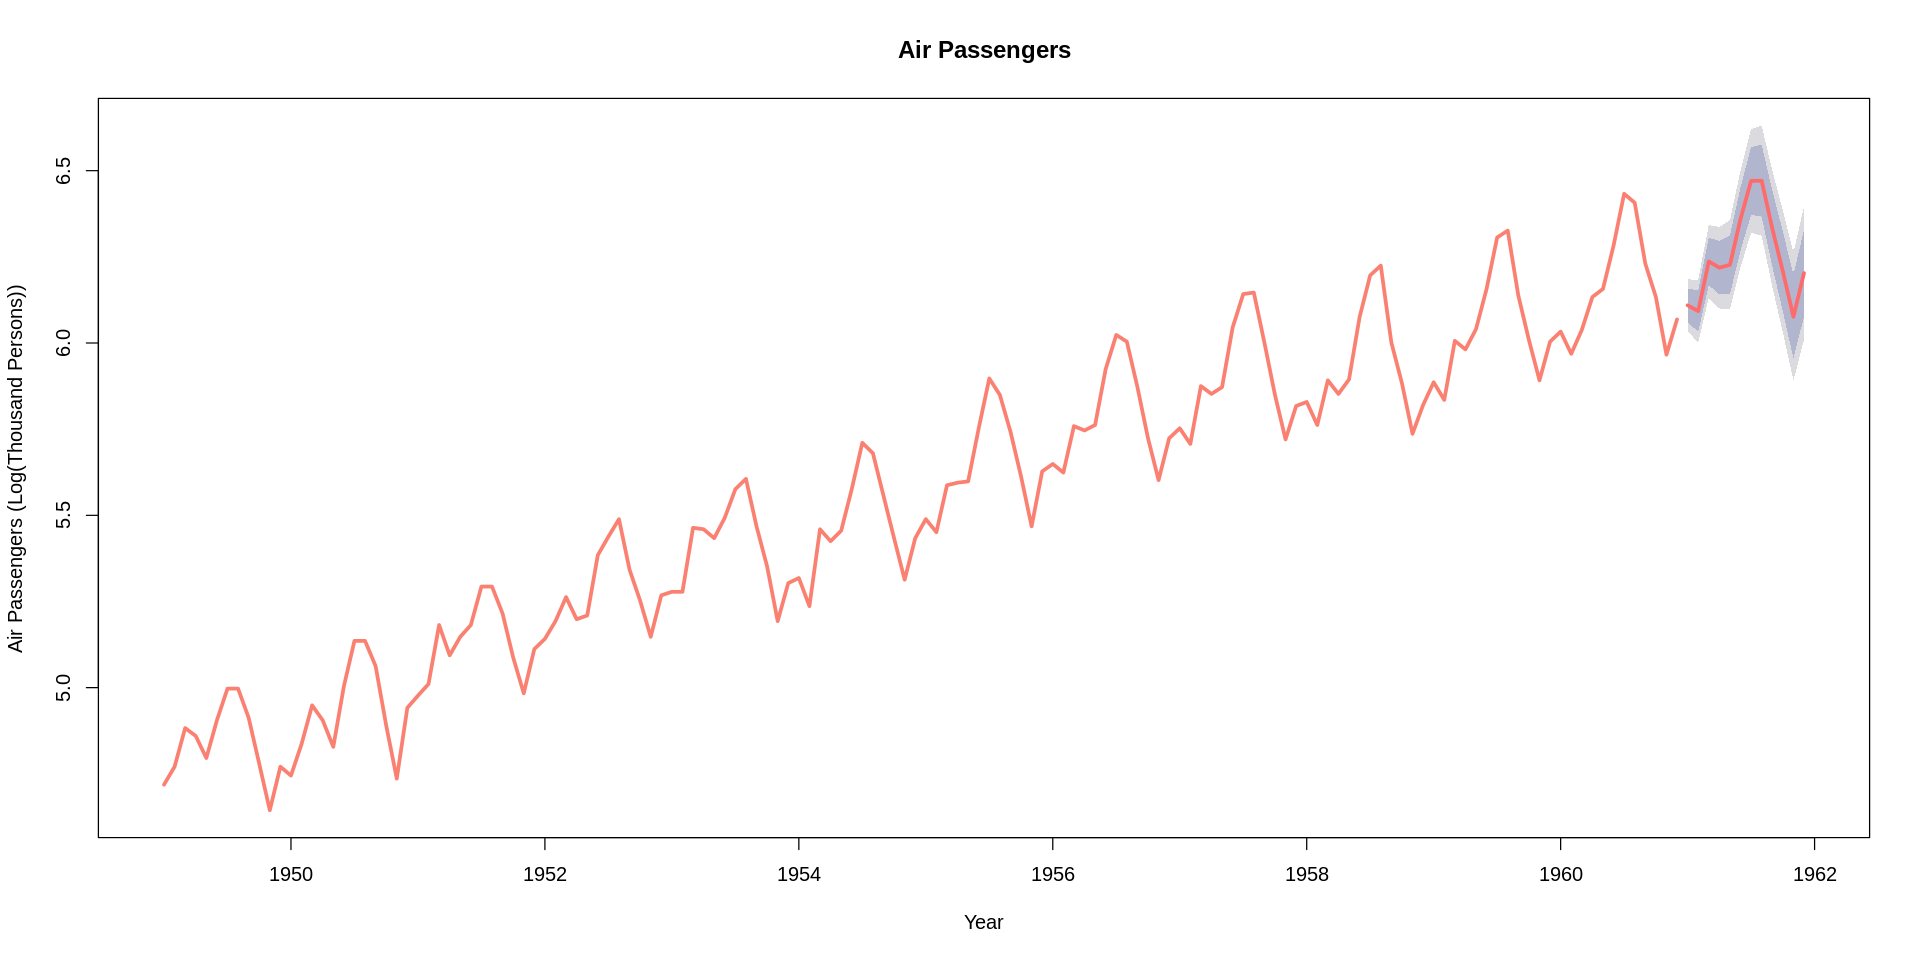

In [ ]:
plot(lair.ets.pred, col = "salmon", lwd = 3,
    fcol = "indianred1", flwd =3,
    xlab = "Year", ylab = "Air Passengers (Log(Thousand Persons))",
    main = "Air Passengers")

In [ ]:
lair.ets.pred$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,6.109335,6.092542,6.236626,6.218531,6.226734,6.359734,6.470379,6.470714,6.332402,6.207747,6.076240,6.202710


In [ ]:
lair.ets.pred$lower

,80%,95%
Jan 1961,6.060306,6.034351
Feb 1961,6.032679,6.000989
Mar 1961,6.167535,6.130960
Apr 1961,6.141239,6.100323
May 1961,6.141971,6.097100
Jun 1961,6.268049,6.219514
Jul 1961,6.372206,6.320237
Aug 1961,6.366406,6.311189
Sep 1961,6.222252,6.163942
Oct 1961,6.092003,6.030732


In [ ]:
lair.ets.pred$upper

,80%,95%
Jan 1961,6.158365,6.184319
Feb 1961,6.152405,6.184094
Mar 1961,6.305718,6.342292
Apr 1961,6.295823,6.336738
May 1961,6.311498,6.356369
Jun 1961,6.451419,6.499954
Jul 1961,6.568552,6.620521
Aug 1961,6.575023,6.630240
Sep 1961,6.442553,6.500863
Oct 1961,6.323491,6.384762


In [ ]:
air.mean = exp(lair.ets.pred$mean)
air.lower = exp(lair.ets.pred$lower)
air.upper = exp(lair.ets.pred$upper)
air.pred = cbind(air.mean, air.lower, air.upper)
air.pred

,air.mean,air.lower.80%,air.lower.95%,air.upper.80%,air.upper.95%
Jan 1961,450.0395,428.5065,417.5279,472.6544,485.0826
Feb 1961,442.5448,416.8301,403.8280,469.8459,484.9735
Mar 1961,511.1312,477.0088,459.8775,547.6945,568.0971
Apr 1961,501.9652,464.6289,446.0019,542.3017,564.9506
May 1961,506.1001,464.9691,444.5667,550.8694,576.1504
Jun 1961,578.0926,527.4475,502.4591,633.6007,665.1110
Jul 1961,645.7285,585.3479,555.7046,712.3375,750.3361
Aug 1961,645.9450,581.9626,550.6992,716.9619,757.6640
Sep 1961,562.5062,503.8364,475.2978,628.0078,665.7157
Oct 1961,496.5811,442.3064,416.0193,557.5158,592.7436


In [ ]:
austourists

,Qtr1,Qtr2,Qtr3,Qtr4
1999,30.05251,19.14850,25.31769,27.59144
2000,32.07646,23.48796,28.47594,35.12375
2001,36.83848,25.00702,30.72223,28.69376
2002,36.64099,23.82461,29.31168,31.77031
2003,35.17788,19.77524,29.60175,34.53884
2004,41.27360,26.65586,28.27986,35.19115
2005,42.20566,24.64917,32.66734,37.25735
2006,45.24246,29.35048,36.34421,41.78208
2007,49.27660,31.27540,37.85063,38.83704
2008,51.23690,31.83855,41.32342,42.79900


In [ ]:
austourists.ets =  ets(austourists)
austourists.ets

ETS(M,A,M) 

Call:
 ets(y = austourists) 

  Smoothing parameters:
    alpha = 0.3156 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 24.7499 
    b = 0.5124 
    s = 1.0371 0.9596 0.7702 1.2331

  sigma:  0.0588

     AIC     AICc      BIC 
409.5036 412.6070 429.4792 

ERROR: ignored

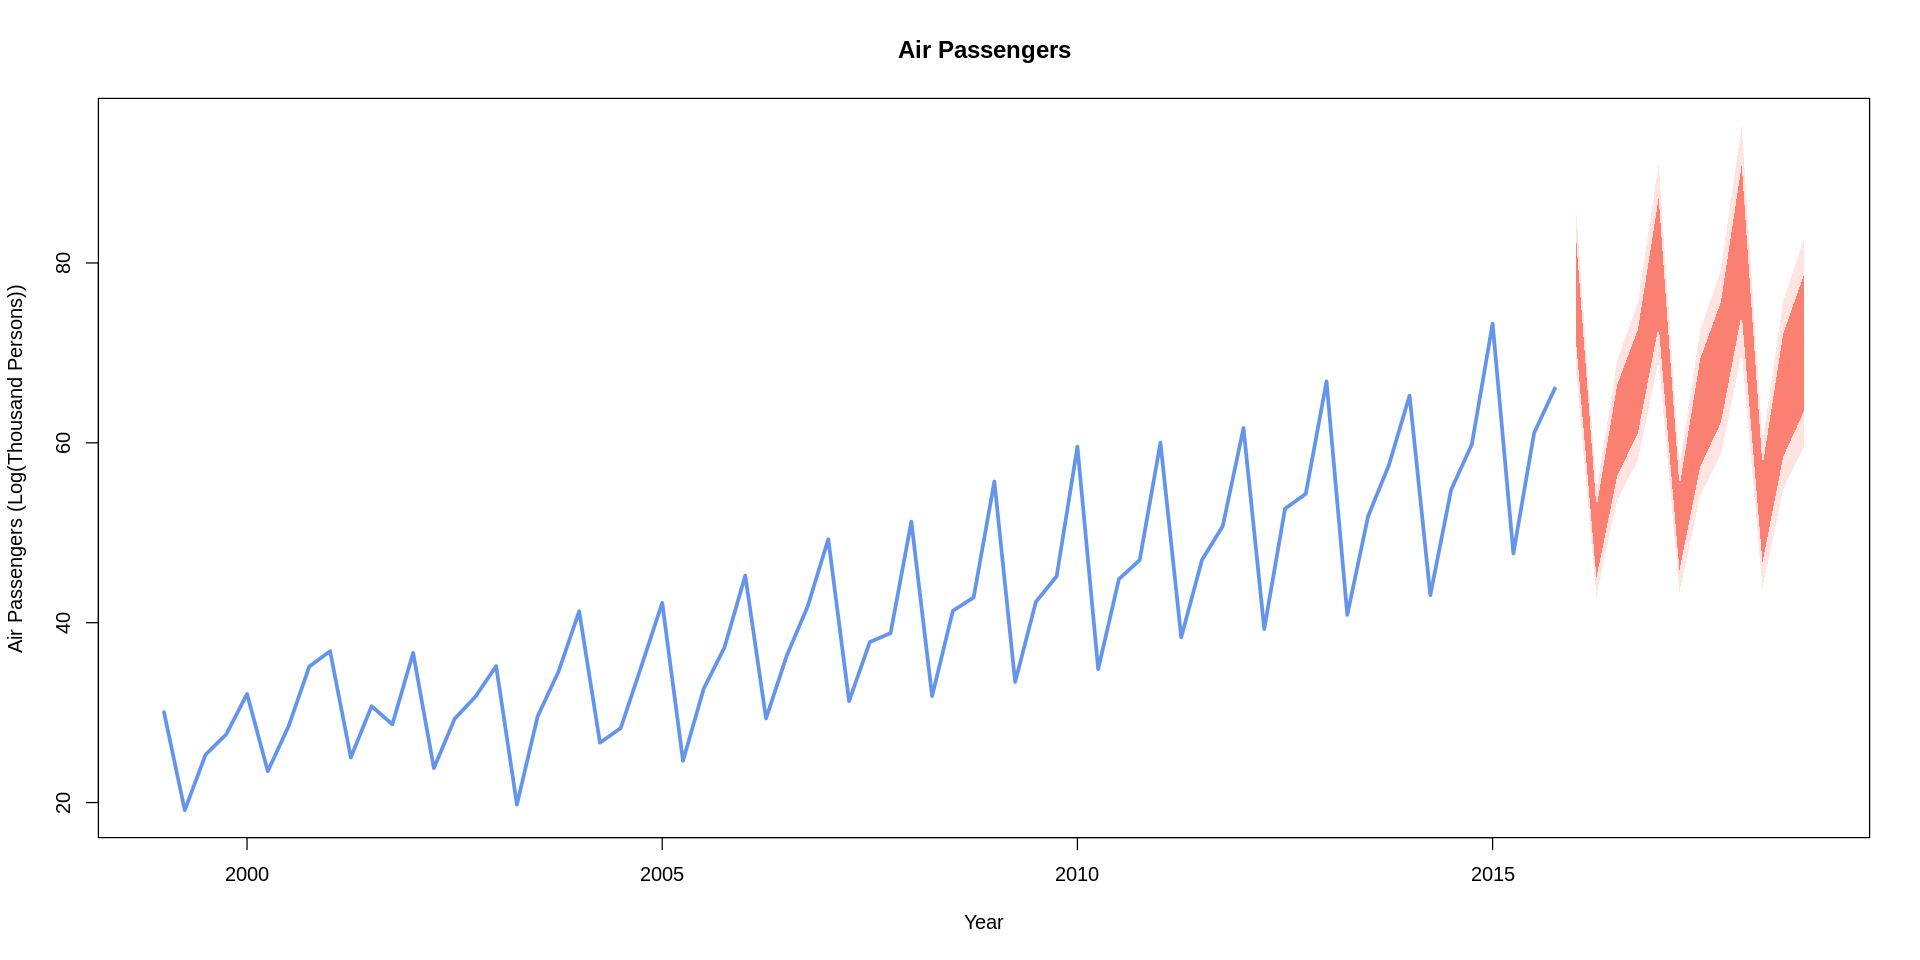

In [ ]:
plot(forecast(austourists.ets, h =12), 
    col = "cornflowerblue", lwd = 3,
    fcol = "loyalblue", flwd =3,
    flty =1,  shadecols = c("mistyrose", "salmon"),
    xlab = "Year", ylab = "Air Passengers (Log(Thousand Persons))",
    main = "Air Passengers")